# Prediction of POFA Concrete Compressive Strength

### Importing the necessary libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

### Load the dataset

In [29]:
dataset = r"C:\Users\Dell\Documents\ML PCC data.xlsx"
pf = pd.read_excel(dataset, sheet_name= "POFA")
pf.head(10)

,W/B ratio,%Addition,Cement,POFA,Density of Concrete,Fine Agg.,Coarse Agg.,Water,SiO2,Al2O3,Fe2O3,CaO,LOI,Curing Age,Compressive Strength,SuperPlasticiser,References,Link,MIX RATIO
0,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,58.3,6.69,9.77,6.72,7.34,7,39.31,11.5,CAPOFA,https://www.researchgate.net/publication/25816...,NaN
1,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,58.3,6.69,9.77,6.72,7.34,28,48.72,11.5,CAPOFA,https://www.researchgate.net/publication/25816...,NaN
2,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,58.3,6.69,9.77,6.72,7.34,90,53.02,11.5,CAPOFA,https://www.researchgate.net/publication/25816...,NaN
3,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,59.6,7.05,8.77,8.06,14.85,7,39.61,11.5,KTPOFA,https://www.researchgate.net/publication/25816...,NaN
4,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,59.6,7.05,8.77,8.06,14.85,28,41.58,11.5,KTPOFA,https://www.researchgate.net/publication/25816...,NaN
5,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,59.6,7.05,8.77,8.06,14.85,90,53.44,11.5,KTPOFA,https://www.researchgate.net/publication/25816...,NaN
6,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,52.5,8.83,5.73,11.30,6.72,7,28.79,11.5,ALPOFA,https://www.researchgate.net/publication/25816...,NaN
7,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,52.5,8.83,5.73,11.30,6.72,28,36.87,11.5,ALPOFA,https://www.researchgate.net/publication/25816...,NaN
8,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,52.5,8.83,5.73,11.30,6.72,90,51.95,11.5,ALPOFA,https://www.researchgate.net/publication/25816...,NaN
9,0.28,0.0,500.0,0.0,NaN,711.0,1067.0,145.0,21.9,5.00,2.60,65.10,1.30,7,43.11,11.5,Control,https://www.researchgate.net/publication/25816...,NaN


### Initial Data Exploration and Data Cleaning

In [30]:
#Checking the number of rows and columns
rows, cols = pf.shape
print("This data has {} rows and {} columns".format(rows, cols))


This data has 924 rows and 19 columns


In [31]:
pf.columns

Index(['W/B ratio', '%Addition', 'Cement', 'POFA', 'Density of Concrete',
       'Fine Agg.', 'Coarse Agg.', 'Water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO',
       'LOI', 'Curing Age', 'Compressive Strength', 'SuperPlasticiser',
       'References', 'Link', 'MIX RATIO'],
      dtype='object')

#### Let's rename the columns

In [32]:
pf = pf.rename(columns={'W/B ratio':'w/b_ratio', '%Addition':'perc_add', 'Cement':'cement', 'POFA':'pofa', 'Density of Concrete':'concrete_density',
       'Fine Agg.':'fine_agg', 'Coarse Agg.':'coarse_agg', 'Water':'water', 'LOI':'loi', 'Curing Age':'age', 'Compressive Strength':'compr_strength', 'SuperPlasticiser':'superplasticiser',
      })
pf.columns

Index(['w/b_ratio', 'perc_add', 'cement', 'pofa', 'concrete_density',
       'fine_agg', 'coarse_agg', 'water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO',
       'loi', 'age', 'compr_strength', 'superplasticiser', 'References',
       'Link', 'MIX RATIO'],
      dtype='object')

#### Let's drop irrelevant columns

In [33]:
pf = pf.drop(['References','Link', 'MIX RATIO','concrete_density'], axis=1)

In [34]:
for col in pf.columns:
    pct_na = (pf[col].isna().sum() / pf[col].count()) * 100
    print(f'{col} has {pct_na:.2f}% NA values')

w/b_ratio has 5.84% NA values
perc_add has 0.65% NA values
cement has 13.65% NA values
pofa has 13.65% NA values
fine_agg has 16.81% NA values
coarse_agg has 9.74% NA values
water has 22.06% NA values
SiO2 has 11.06% NA values
Al2O3 has 11.06% NA values
Fe2O3 has 11.06% NA values
CaO has 11.06% NA values
loi has 31.62% NA values
age has 0.00% NA values
compr_strength has 0.65% NA values
superplasticiser has 12.14% NA values


#### Let's remove rows with no value for compressive strength

In [35]:
pf.dropna(subset=['compr_strength'], inplace=True)
pf.shape

(918, 15)

#### Let's Fill the Empty values

In [36]:
# for Water

water = (pf['water'].isnull()) & (~pf['pofa'].isnull() & ~pf['cement'].isnull())
pf.loc[water, 'pofa'] = (pf.loc[water, 'pofa'] + pf.loc[water, 'cement']) * pf.loc[water, 'w/b_ratio']
pf["water"].isna().sum()

161

In [37]:
#Removing rows with empty values

pf.dropna(subset=['fine_agg', 'SiO2','water'], inplace=True)
pf.shape

(685, 15)

In [38]:
pf = pf.reindex(['w/b_ratio', 'perc_add', 'cement', 'pofa', 'fine_agg', 'coarse_agg', 'water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO',
       'loi', 'superplasticiser', 'age', 'compr_strength'], axis=1)

In [39]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 917
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   w/b_ratio         685 non-null    float64
 1   perc_add          685 non-null    float64
 2   cement            685 non-null    float64
 3   pofa              685 non-null    float64
 4   fine_agg          685 non-null    float64
 5   coarse_agg        685 non-null    float64
 6   water             685 non-null    float64
 7   SiO2              685 non-null    float64
 8   Al2O3             685 non-null    float64
 9   Fe2O3             685 non-null    float64
 10  CaO               685 non-null    float64
 11  loi               539 non-null    float64
 12  superplasticiser  685 non-null    float64
 13  age               685 non-null    int64  
 14  compr_strength    685 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 85.6 KB


### Exploratory Data Analysis

In [40]:
#check the number of duplicates
sum(pf.duplicated())

1

In [41]:
#remove duplicates
pf= pf.drop_duplicates()

In [42]:
pf.describe()

,w/b_ratio,perc_add,cement,pofa,fine_agg,coarse_agg,water,SiO2,Al2O3,Fe2O3,CaO,loi,superplasticiser,age,compr_strength
count,684.000000,684.00000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,538.000000,684.000000,684.000000,684.000000
mean,0.428051,24.60118,341.074099,120.796120,817.213085,856.449664,185.001243,56.307485,4.657800,5.382325,10.625765,6.927714,5.758575,36.423977,47.415214
std,0.151901,17.52210,123.663429,97.369929,158.648314,307.092092,34.978140,15.543718,2.689587,2.847407,14.772865,6.351488,8.006897,47.767327,28.788911
min,0.160000,0.00000,45.560000,0.000000,146.000000,0.000000,107.540000,15.700000,0.900000,1.350000,0.179000,0.480000,0.000000,1.000000,1.700000
25%,0.320000,10.00000,249.999500,51.075000,742.000000,760.000000,168.000000,47.440000,3.150000,3.420000,4.890000,1.800000,0.163240,7.000000,27.225000
50%,0.351485,20.00000,330.000000,96.000000,795.000000,895.000000,176.000000,62.270000,3.900000,4.410000,6.400000,4.830000,5.000000,28.000000,40.250000
75%,0.500000,30.00000,410.000000,158.500000,925.000000,1033.000000,205.000000,68.630000,5.720000,6.330000,10.800000,10.000000,7.013850,56.000000,66.550000
max,1.190758,80.00000,936.000000,451.000000,1350.000000,1428.570000,306.000000,79.230000,11.400000,13.570000,70.370000,20.900000,55.000000,365.000000,155.740741


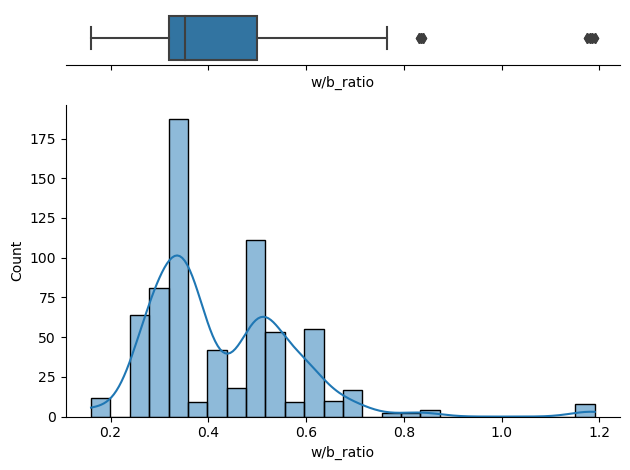

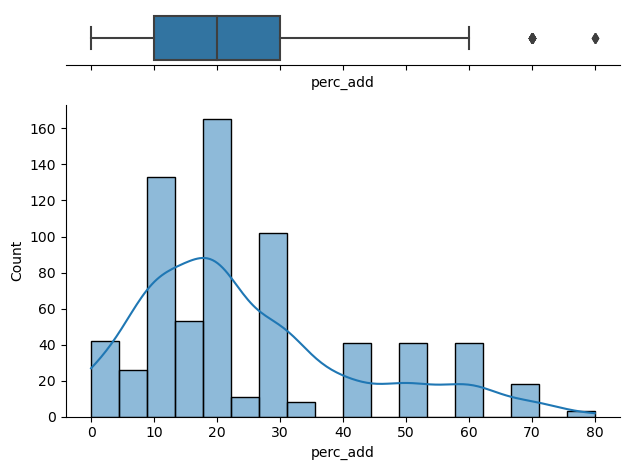

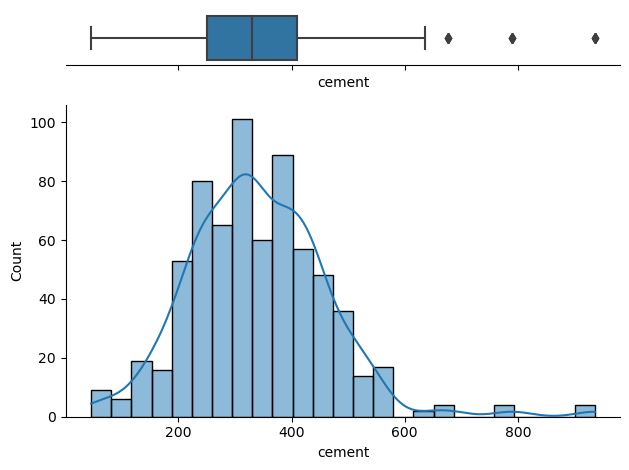

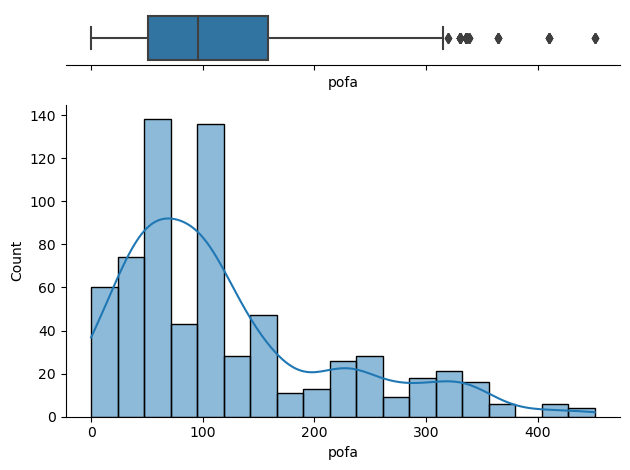

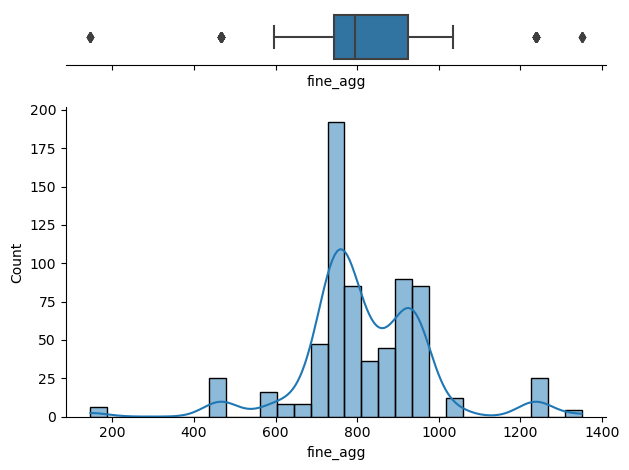

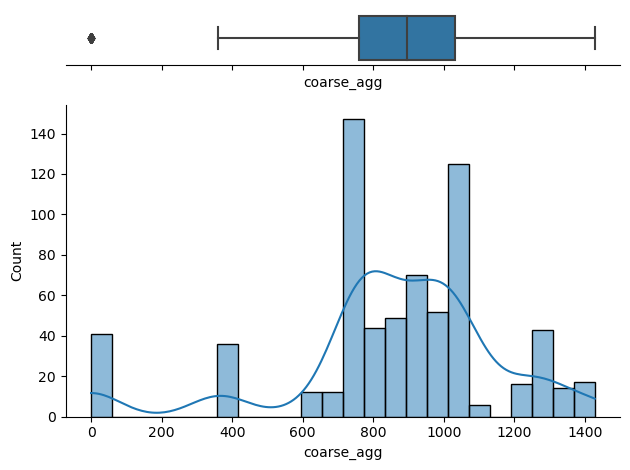

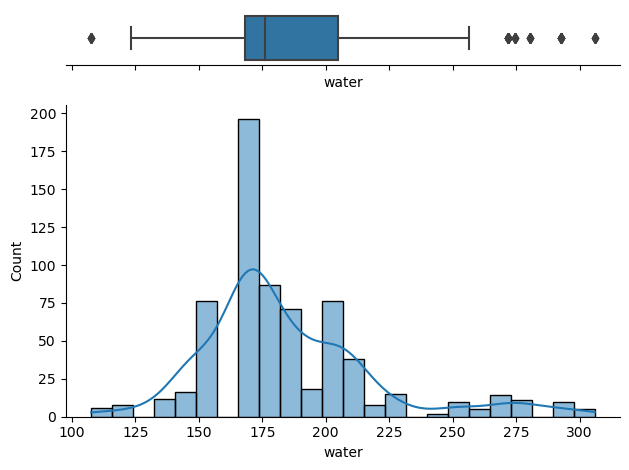

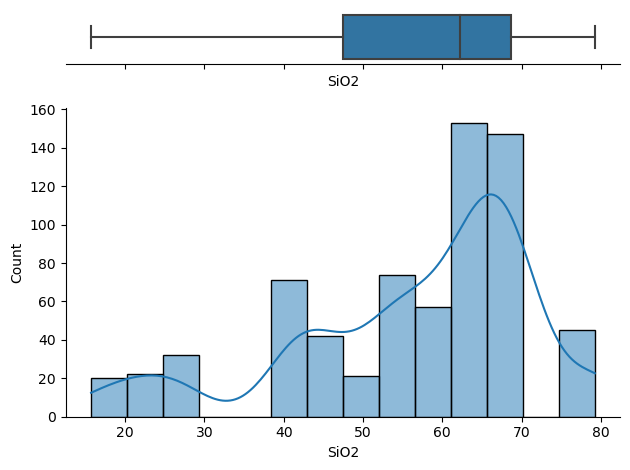

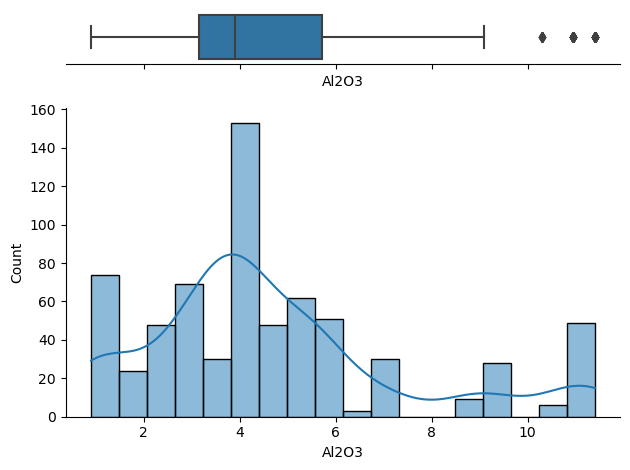

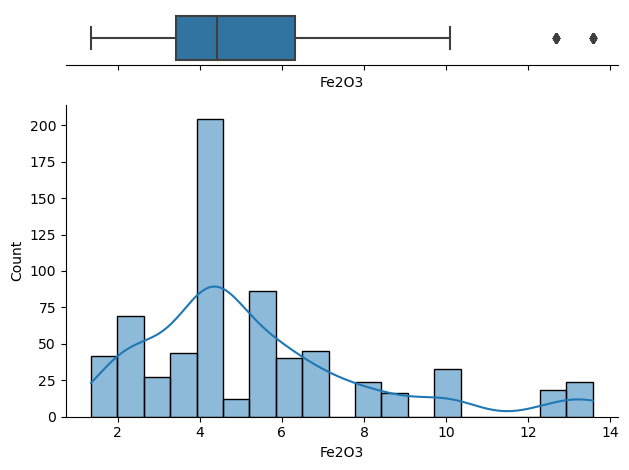

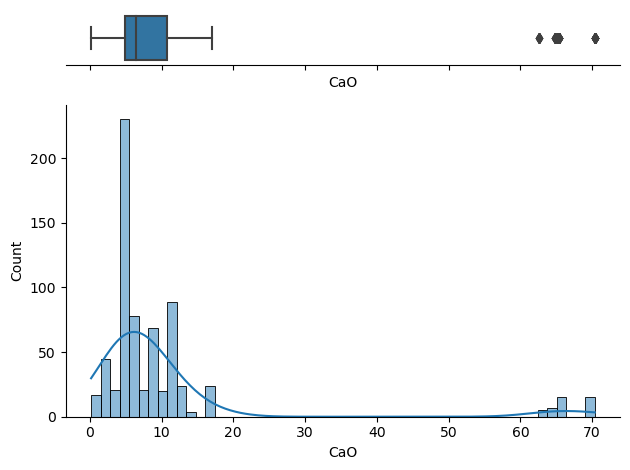

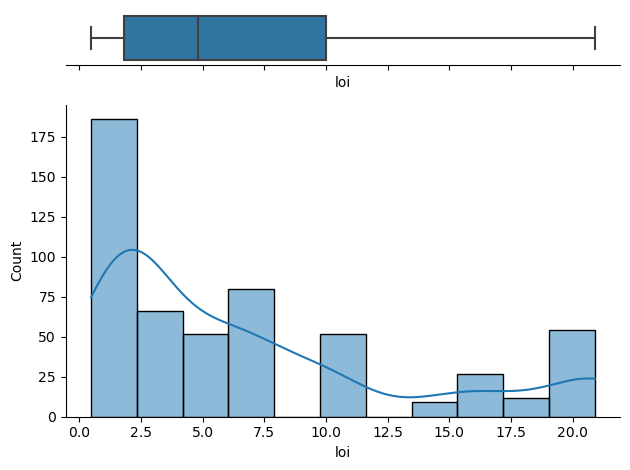

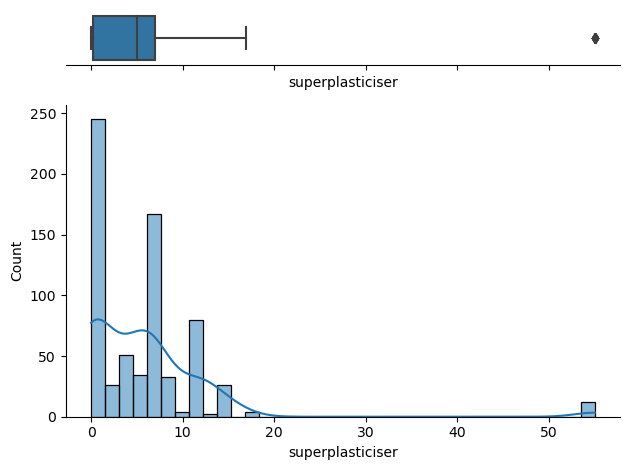

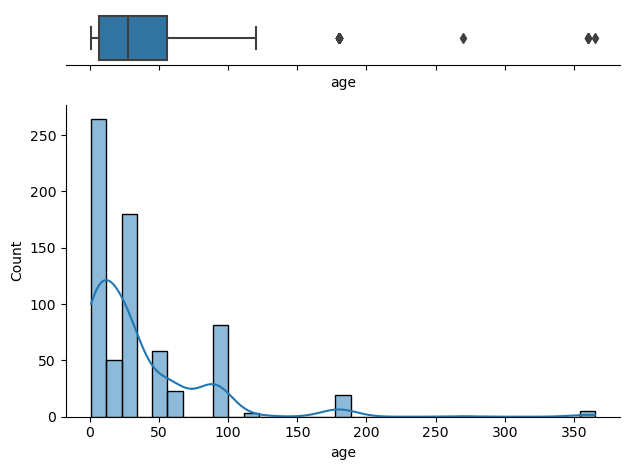

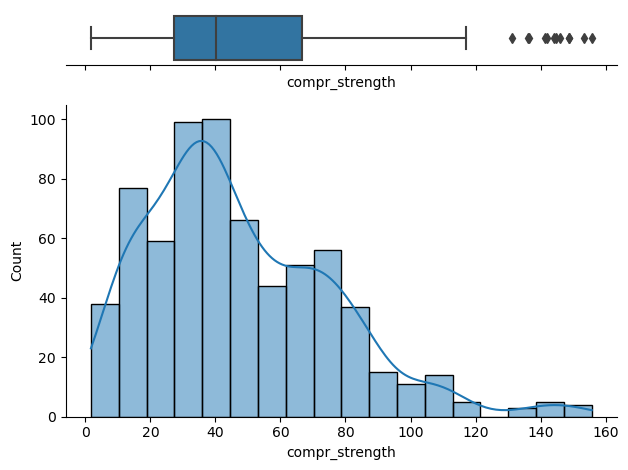

In [43]:
for label in pf:
    # Create subplots with 2 rows (for boxplot and histogram), sharing the x-axis
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Create a histogram using Seaborn and place it in the 'ax_hist' subplot and boxplot in 'ax_box'
    sns.histplot(data=pf, x=label, kde=True, ax=ax_hist)
    sns.boxplot(data=pf, x=label, ax=ax_box)
    
    # Ensure subplots don't overlap
    plt.tight_layout()
    
    ax_box.set(yticks=[]) # Remove y-axis ticks from the boxplot subplot
    
    sns.despine(ax=ax_hist)  # Remove top spine from the histogram subplot
    
    sns.despine(ax=ax_box, left=True)  # Remove left spine from the boxplot subplot
    
    plt.show()


superplasticiser has a lot of zero values, this isn't abnormal as it is not necessary in concrete. it is an additive used to enhance the properties of the concrete.

### Checking Relationships

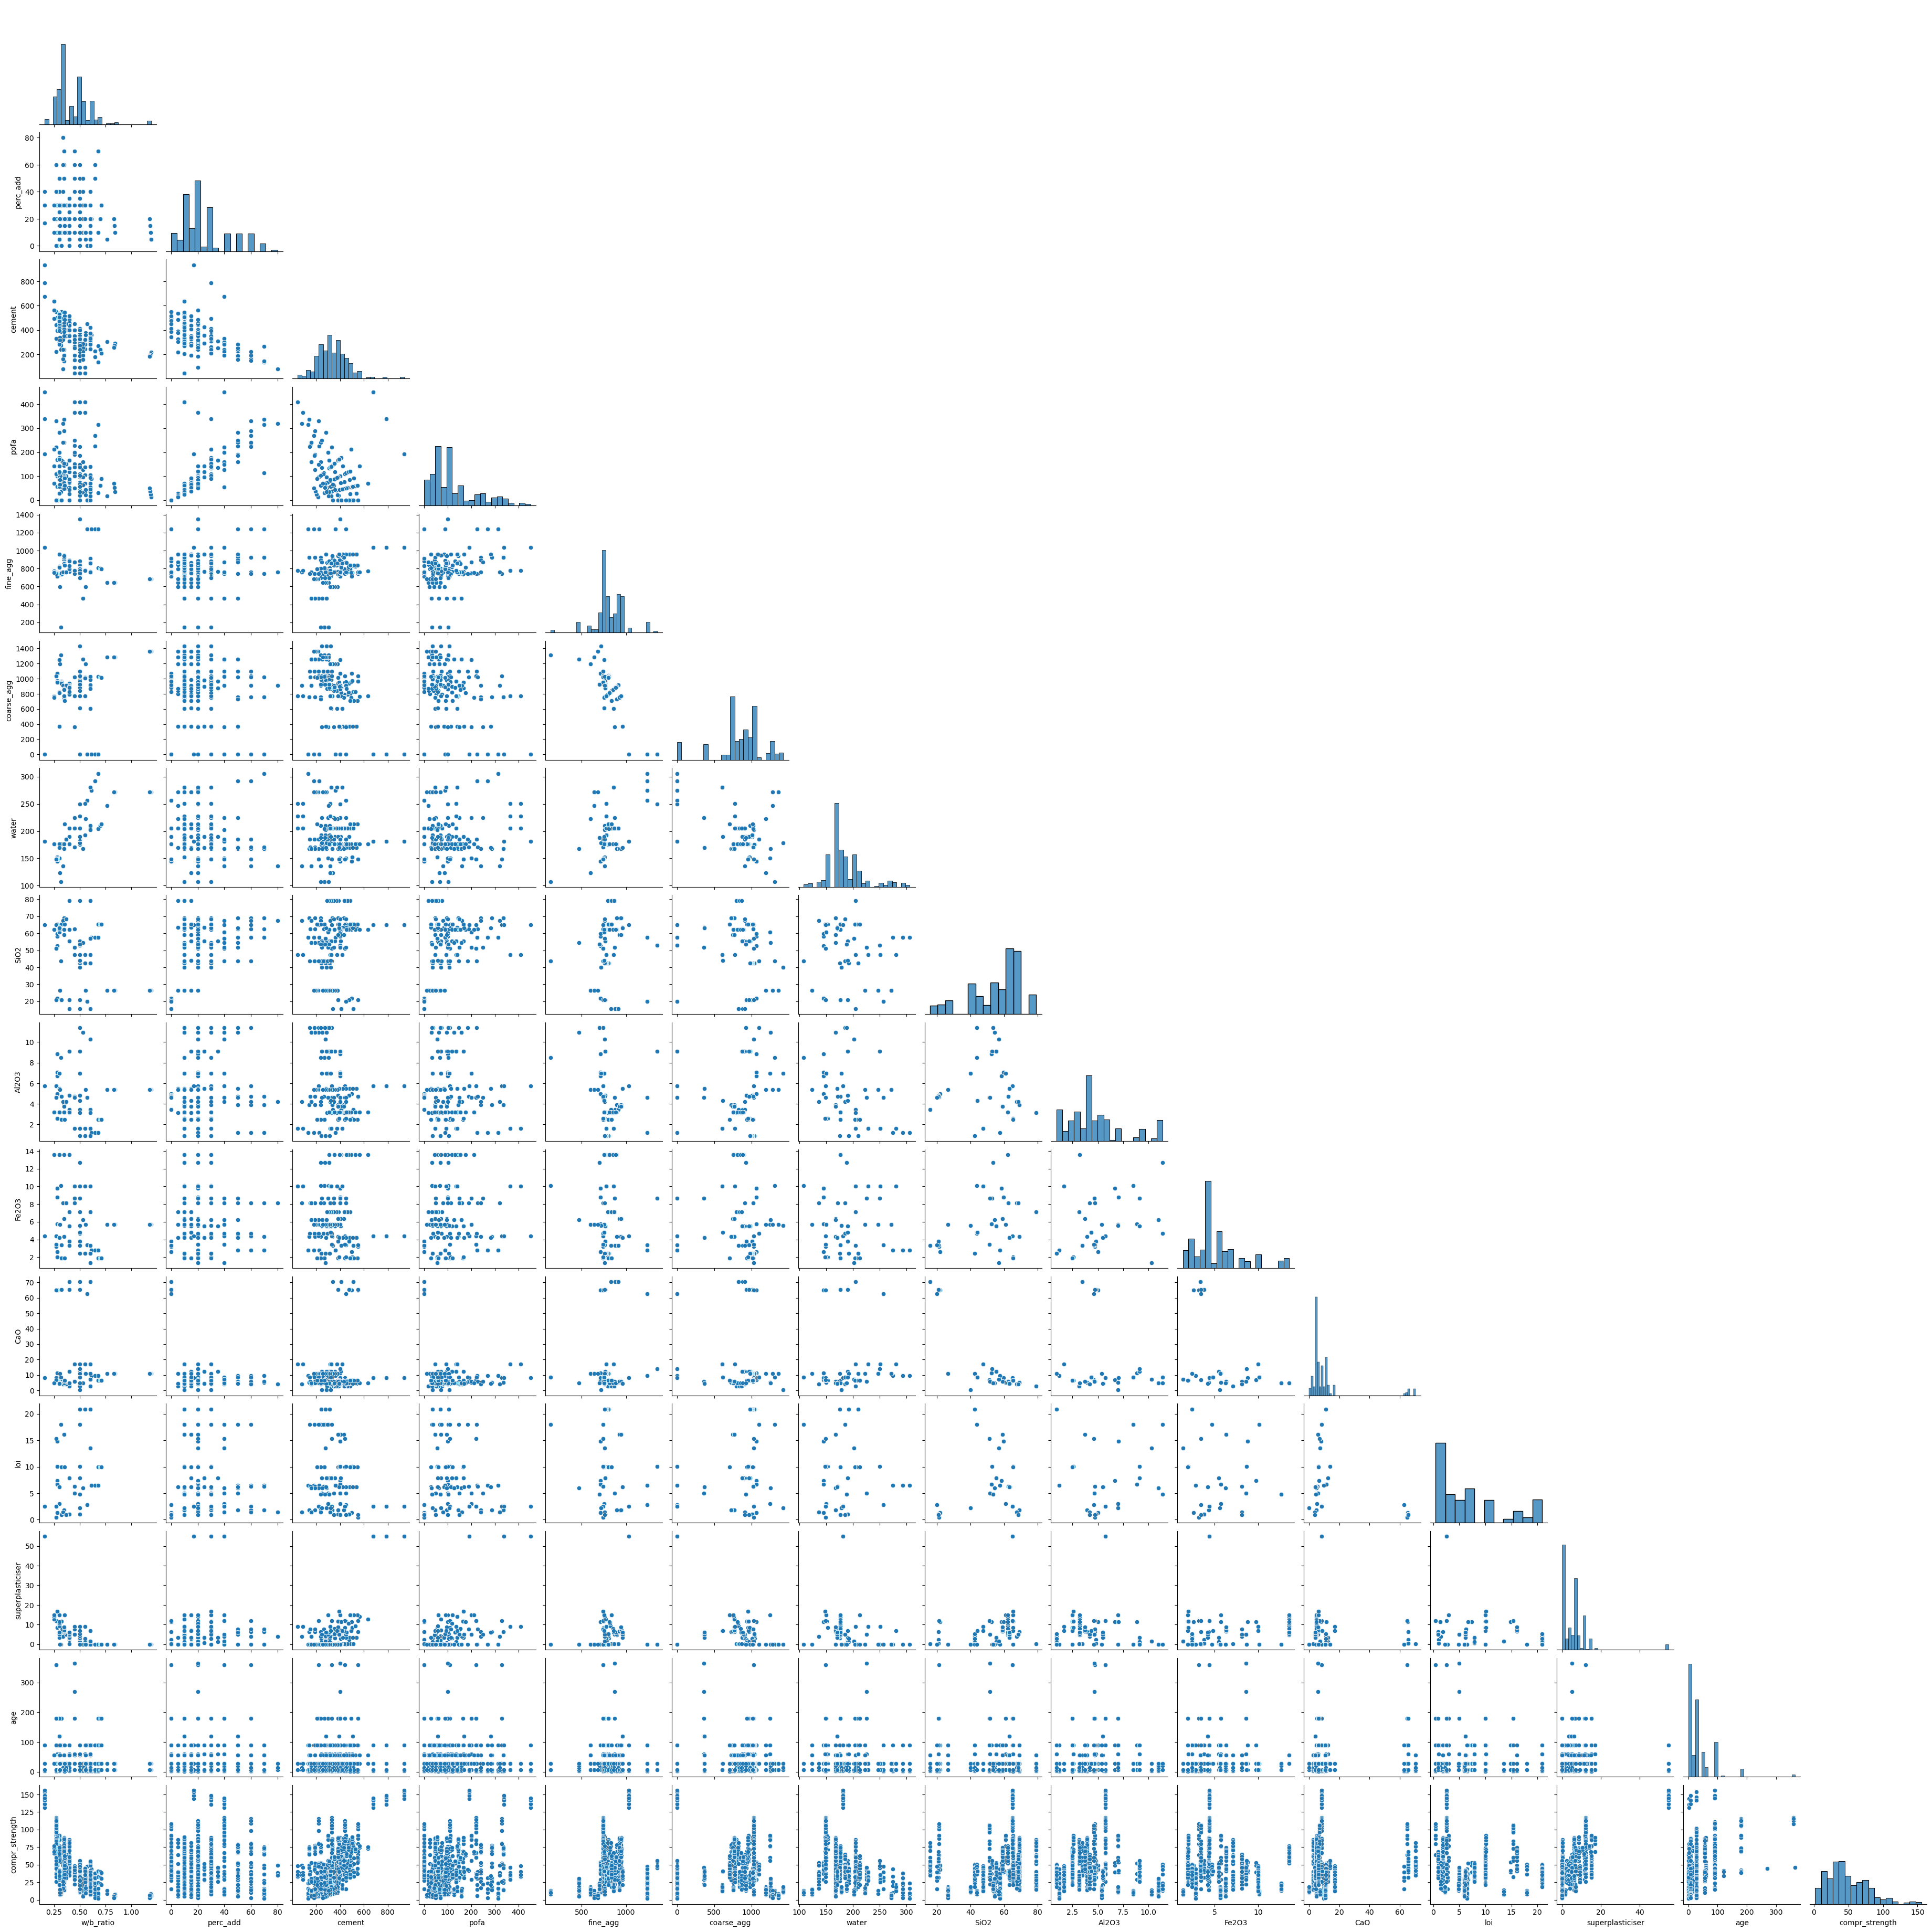

In [44]:
sns.pairplot(data=pf, corner=True)
plt.show()

 from this plot, we notice that;
- there's a linear relationship between pofa and percentage addition
- linear relationship between cement and compressive strength
- negative relationship between fine aggregate and coarse aggregate
- The discrete ages that compressive strength tests were performed

Because of the discrete ages, a violin/box plot is more useful in vizualizing the relationship.

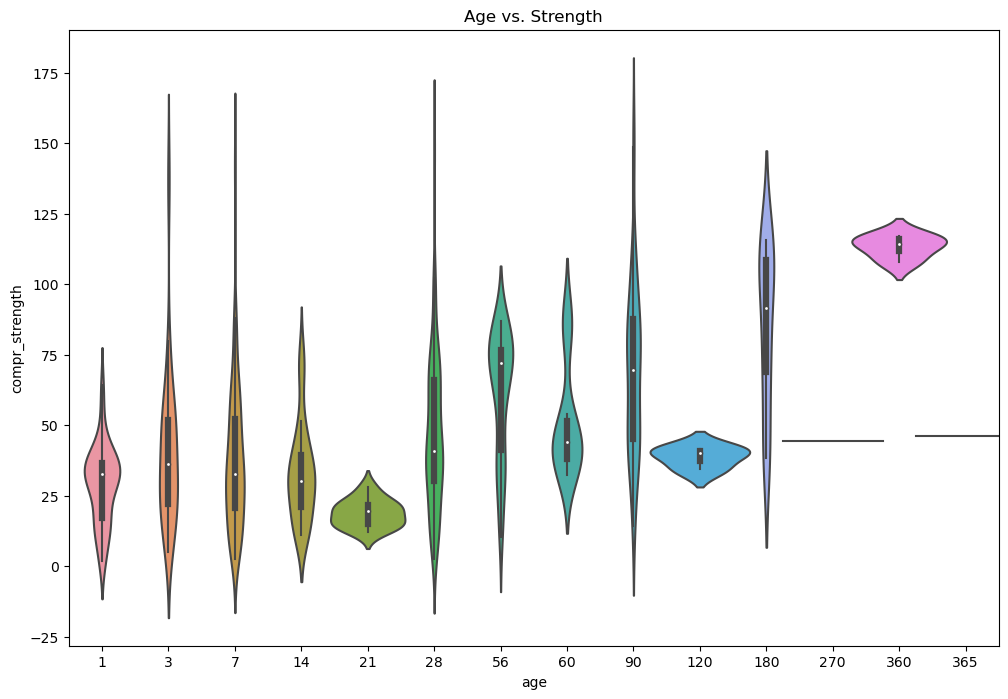

In [45]:
# Violin plot of age against compressive strength

plt.figure(figsize=(12, 8), label='Age vs. Strength')
plt.title('Age vs. Strength')
sns.violinplot(data=pf, x="age", y="compr_strength", width=1.5)
plt.show()

This plot clearly shows there is a linear positive relationship which dropped off after 90 days

In [46]:
pf.corr()

,w/b_ratio,perc_add,cement,pofa,fine_agg,coarse_agg,water,SiO2,Al2O3,Fe2O3,CaO,loi,superplasticiser,age,compr_strength
w/b_ratio,1.000000,-0.160354,-0.458645,-0.302390,-0.071680,0.175085,0.739821,-0.381909,-0.052728,-0.018012,0.067449,0.403451,-0.553072,-0.139855,-0.637699
perc_add,-0.160354,1.000000,-0.552063,0.821657,0.153700,-0.144478,-0.122182,0.350518,0.046978,-0.070991,-0.358425,-0.206602,0.130227,0.017503,0.047066
cement,-0.458645,-0.552063,1.000000,-0.386288,0.181289,-0.299973,-0.138163,0.030451,-0.048339,-0.059965,0.210057,-0.101254,0.547773,0.088739,0.525221
pofa,-0.302390,0.821657,-0.386288,1.000000,0.229957,-0.301097,-0.083342,0.340056,-0.070449,0.017372,-0.277542,-0.294631,0.433732,0.028543,0.254945
fine_agg,-0.071680,0.153700,0.181289,0.229957,1.000000,-0.829899,0.381973,0.280173,-0.438602,-0.220371,0.041865,-0.207287,0.171178,-0.021294,0.233392
coarse_agg,0.175085,-0.144478,-0.299973,-0.301097,-0.829899,1.000000,-0.381289,-0.279338,0.293952,0.057036,-0.022000,0.180556,-0.310257,0.027523,-0.211898
water,0.739821,-0.122182,-0.138163,-0.083342,0.381973,-0.381289,1.000000,-0.229602,-0.273578,0.004505,0.135835,0.164158,-0.252594,-0.108601,-0.384968
SiO2,-0.381909,0.350518,0.030451,0.340056,0.280173,-0.279338,-0.229602,1.000000,-0.076603,0.105541,-0.700500,-0.369937,0.209439,-0.002776,0.295834
Al2O3,-0.052728,0.046978,-0.048339,-0.070449,-0.438602,0.293952,-0.273578,-0.076603,1.000000,0.291252,-0.077597,-0.256449,-0.058766,-0.030525,-0.136906
Fe2O3,-0.018012,-0.070991,-0.059965,0.017372,-0.220371,0.057036,0.004505,0.105541,0.291252,1.000000,-0.192246,-0.256331,-0.060907,-0.085350,-0.142378


<Axes: >

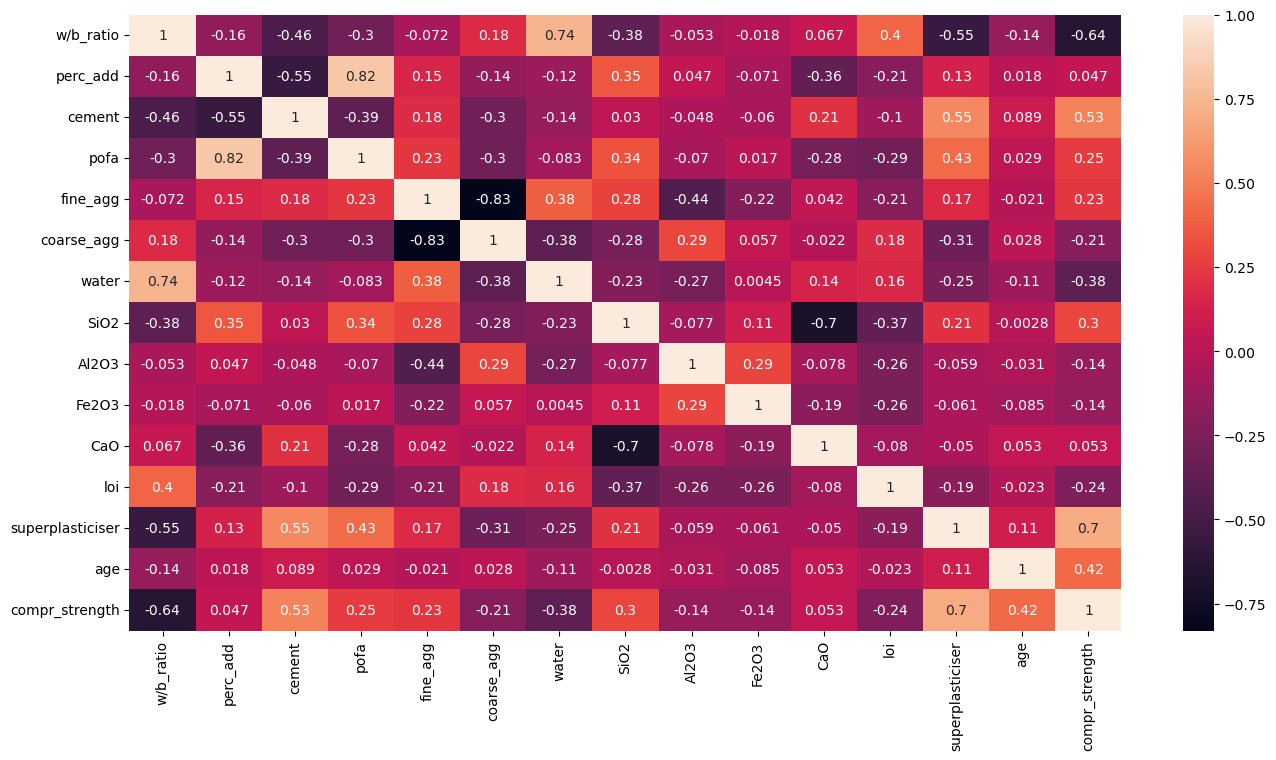

In [48]:
plt.figure(figsize=(16, 8))
sns.heatmap(pf.corr(), annot=True)

we notice that the strongest relationship is between:
- coarse aggregate and fine aggregate
- CaO and SiO2
- w/b ratio and compressive strength
- w/b ratio and super plasticiser
- cement and compressive strength
- superplasticiser and compressive strength
- cement and w/b ratio
- water and w/b ratio
- superplasticiser and cement
- superplasticiser and pofa

most of the relationship were strong (greater than 0.5) with negative 0.83 being the highest between coarse aggregate and fine aggregate.


### Let's create new Features

In [49]:
pf['SiAlFe'] = pf['Al2O3']+pf['SiO2']+pf['Fe2O3']
pf['w/b'] = pf['water']/(pf['cement'] +pf['pofa'])
pf['w/c'] = pf['water']/pf['cement']
pf['w/p'] = pf['water']/pf['pofa']
pf['w/s'] = pf['water']/pf['fine_agg']
pf['w/ca'] = pf['water']/pf['coarse_agg']
pf['w/SiAlFe'] = pf['water']/pf['SiAlFe'] 
pf['w/pl'] = pf['water']/pf['superplasticiser']
pf['pl/b'] = pf['superplasticiser']/(pf['cement'] +pf['pofa'])
pf['f/ca'] = pf['fine_agg']/pf['coarse_agg']
pf['density'] = pf['cement']+pf['fine_agg']+pf['coarse_agg']
pf['w/d'] = pf['water']/(pf['cement']+pf['fine_agg']+pf['coarse_agg'])
pf.head()

,w/b_ratio,perc_add,cement,pofa,fine_agg,coarse_agg,water,SiO2,Al2O3,Fe2O3,...,w/c,w/p,w/s,w/ca,w/SiAlFe,w/pl,pl/b,f/ca,density,w/d
0,0.28,20.0,400.0,100.0,711.0,1067.0,145.0,58.3,6.69,9.77,...,0.3625,1.45,0.203938,0.135895,1.939540,12.608696,0.023,0.666354,2178.0,0.066575
1,0.28,20.0,400.0,100.0,711.0,1067.0,145.0,58.3,6.69,9.77,...,0.3625,1.45,0.203938,0.135895,1.939540,12.608696,0.023,0.666354,2178.0,0.066575
2,0.28,20.0,400.0,100.0,711.0,1067.0,145.0,58.3,6.69,9.77,...,0.3625,1.45,0.203938,0.135895,1.939540,12.608696,0.023,0.666354,2178.0,0.066575
3,0.28,20.0,400.0,100.0,711.0,1067.0,145.0,59.6,7.05,8.77,...,0.3625,1.45,0.203938,0.135895,1.922567,12.608696,0.023,0.666354,2178.0,0.066575
4,0.28,20.0,400.0,100.0,711.0,1067.0,145.0,59.6,7.05,8.77,...,0.3625,1.45,0.203938,0.135895,1.922567,12.608696,0.023,0.666354,2178.0,0.066575


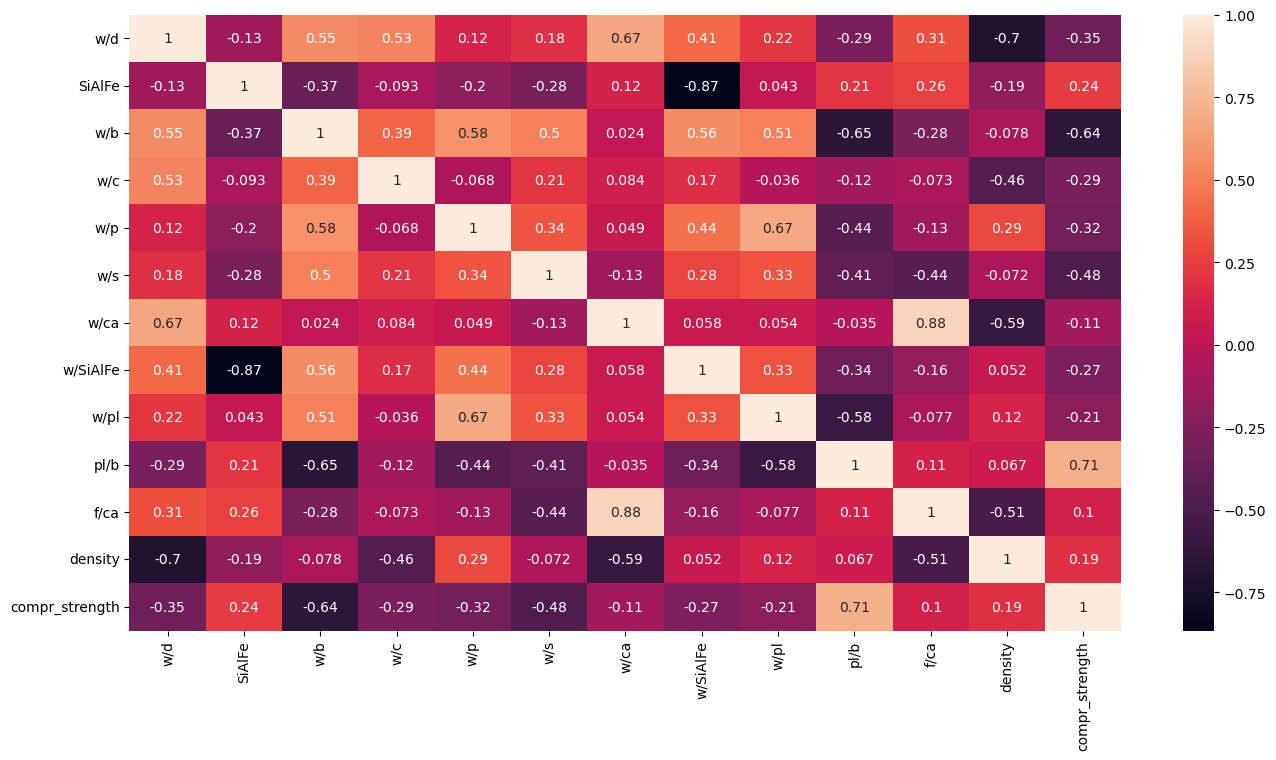

In [50]:
selected_columns = ['w/d','SiAlFe', 'w/b', 'w/c', 'w/p', 'w/s', 'w/ca', 'w/SiAlFe','w/pl','pl/b','f/ca','density','compr_strength']
correlation_matrix = pf[selected_columns].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


from the new features created, we notice that there's a strong relationship between;
- pl/b and compressive strength
- w/s and compressive strength

### Relationship between all features and the target variable

In [51]:
pf = pf.drop(['SiAlFe','w/b','w/ca','w/pl','f/ca','loi','w/p','w/SiAlFe','w/c'], axis = 1)
# Let's check the pearson's correlation between all input features and the target variable

correlations = []
for col in pf.columns.drop('compr_strength'):
    val = scipy.stats.pearsonr(pf[col],pf.compr_strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)
    
    

,Feature,Correlation with Strength
14,pl/b,0.711376
11,superplasticiser,0.696420
2,cement,0.525221
12,age,0.422254
7,SiO2,0.295834
3,pofa,0.254945
4,fine_agg,0.233392
15,density,0.188746
10,CaO,0.052980
1,perc_add,0.047066


The features that have a very strong relationship between the compressive strength are:
- water/binder ratio
- cement
- superplasticiser
- superplasticiser/binder

Also, age has a quite significant relationship with compressive strength.

In [52]:
pf.columns

Index(['w/b_ratio', 'perc_add', 'cement', 'pofa', 'fine_agg', 'coarse_agg',
       'water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'superplasticiser', 'age',
       'compr_strength', 'w/s', 'pl/b', 'density', 'w/d'],
      dtype='object')

# Data Preparation for Training

In [57]:
# Import the necessary libraries

from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [58]:
#defining input and target variables

X = pf.drop(['compr_strength'], axis = 1)
y = pf['compr_strength']

### Data splitting into Train, Validation and Test data

In [59]:

# Splitting data into train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the train data into train (70%) and validation (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [60]:
# Min/Max Scaling of numeric features

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Model Training


In [74]:

#
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'XGBoost': XGBRegressor(),
    'CATBoost': CatBoostRegressor()
}

results = {'Model': [], 'Mean RMSE': [], 'Mean R2': []}

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define your k-fold

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_mean_rmse = np.sqrt(-scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    cv_r2_mean = np.mean(r2_scores)
    
    results['Model'].append(model_name)
    results['Mean RMSE'].append(cv_mean_rmse)
    results['Mean R2'].append(cv_r2_mean)

results_df = pd.DataFrame(results).sort_values('Mean R2', ascending=False)
print(results_df)


Learning rate set to 0.035168
0:	learn: 28.7097195	total: 1.4ms	remaining: 1.4s
1:	learn: 28.1874750	total: 2.53ms	remaining: 1.26s
2:	learn: 27.5556976	total: 3.71ms	remaining: 1.23s
3:	learn: 26.9633717	total: 4.89ms	remaining: 1.22s
4:	learn: 26.4459001	total: 6.18ms	remaining: 1.23s
5:	learn: 25.9083019	total: 7.51ms	remaining: 1.24s
6:	learn: 25.4602901	total: 8.87ms	remaining: 1.26s
7:	learn: 24.9483307	total: 10.4ms	remaining: 1.28s
8:	learn: 24.4367611	total: 11.8ms	remaining: 1.3s
9:	learn: 23.9105246	total: 13.3ms	remaining: 1.32s
10:	learn: 23.4661979	total: 14.9ms	remaining: 1.34s
11:	learn: 23.0354865	total: 16.3ms	remaining: 1.34s
12:	learn: 22.5749839	total: 17.9ms	remaining: 1.36s
13:	learn: 22.1249372	total: 19.5ms	remaining: 1.37s
14:	learn: 21.7327363	total: 21ms	remaining: 1.38s
15:	learn: 21.3702878	total: 22.5ms	remaining: 1.39s
16:	learn: 20.9754131	total: 24ms	remaining: 1.39s
17:	learn: 20.5729481	total: 25.7ms	remaining: 1.4s
18:	learn: 20.2042739	total: 27.4m

283:	learn: 2.9770411	total: 385ms	remaining: 971ms
284:	learn: 2.9719608	total: 387ms	remaining: 971ms
285:	learn: 2.9625978	total: 389ms	remaining: 971ms
286:	learn: 2.9506769	total: 390ms	remaining: 970ms
287:	learn: 2.9442188	total: 392ms	remaining: 968ms
288:	learn: 2.9379909	total: 393ms	remaining: 967ms
289:	learn: 2.9324571	total: 394ms	remaining: 965ms
290:	learn: 2.9263669	total: 395ms	remaining: 964ms
291:	learn: 2.9164726	total: 397ms	remaining: 962ms
292:	learn: 2.9058816	total: 398ms	remaining: 960ms
293:	learn: 2.8996332	total: 399ms	remaining: 959ms
294:	learn: 2.8868063	total: 400ms	remaining: 957ms
295:	learn: 2.8798487	total: 401ms	remaining: 955ms
296:	learn: 2.8751342	total: 403ms	remaining: 953ms
297:	learn: 2.8690812	total: 404ms	remaining: 951ms
298:	learn: 2.8622722	total: 405ms	remaining: 949ms
299:	learn: 2.8555845	total: 406ms	remaining: 947ms
300:	learn: 2.8502866	total: 407ms	remaining: 946ms
301:	learn: 2.8441883	total: 409ms	remaining: 944ms
302:	learn: 

445:	learn: 2.2038405	total: 571ms	remaining: 709ms
446:	learn: 2.2033663	total: 573ms	remaining: 708ms
447:	learn: 2.2029574	total: 574ms	remaining: 708ms
448:	learn: 2.1991248	total: 576ms	remaining: 707ms
449:	learn: 2.1945378	total: 578ms	remaining: 706ms
450:	learn: 2.1921741	total: 579ms	remaining: 705ms
451:	learn: 2.1878400	total: 580ms	remaining: 704ms
452:	learn: 2.1842951	total: 582ms	remaining: 702ms
453:	learn: 2.1813396	total: 583ms	remaining: 701ms
454:	learn: 2.1760057	total: 584ms	remaining: 700ms
455:	learn: 2.1729558	total: 586ms	remaining: 699ms
456:	learn: 2.1725600	total: 587ms	remaining: 697ms
457:	learn: 2.1708843	total: 588ms	remaining: 696ms
458:	learn: 2.1672540	total: 590ms	remaining: 695ms
459:	learn: 2.1636916	total: 592ms	remaining: 695ms
460:	learn: 2.1619115	total: 593ms	remaining: 694ms
461:	learn: 2.1572495	total: 594ms	remaining: 692ms
462:	learn: 2.1528083	total: 595ms	remaining: 690ms
463:	learn: 2.1499841	total: 596ms	remaining: 689ms
464:	learn: 

752:	learn: 1.6070076	total: 952ms	remaining: 312ms
753:	learn: 1.6049297	total: 954ms	remaining: 311ms
754:	learn: 1.6043545	total: 955ms	remaining: 310ms
755:	learn: 1.6037725	total: 957ms	remaining: 309ms
756:	learn: 1.6019039	total: 959ms	remaining: 308ms
757:	learn: 1.6007764	total: 960ms	remaining: 307ms
758:	learn: 1.6004004	total: 962ms	remaining: 305ms
759:	learn: 1.5985373	total: 963ms	remaining: 304ms
760:	learn: 1.5984053	total: 964ms	remaining: 303ms
761:	learn: 1.5976113	total: 965ms	remaining: 301ms
762:	learn: 1.5974206	total: 966ms	remaining: 300ms
763:	learn: 1.5962279	total: 968ms	remaining: 299ms
764:	learn: 1.5954103	total: 969ms	remaining: 298ms
765:	learn: 1.5947465	total: 970ms	remaining: 296ms
766:	learn: 1.5927397	total: 972ms	remaining: 295ms
767:	learn: 1.5921321	total: 973ms	remaining: 294ms
768:	learn: 1.5917603	total: 974ms	remaining: 293ms
769:	learn: 1.5914750	total: 976ms	remaining: 291ms
770:	learn: 1.5912907	total: 977ms	remaining: 290ms
771:	learn: 

914:	learn: 1.4487251	total: 1.14s	remaining: 106ms
915:	learn: 1.4478683	total: 1.14s	remaining: 104ms
916:	learn: 1.4476780	total: 1.14s	remaining: 103ms
917:	learn: 1.4473559	total: 1.14s	remaining: 102ms
918:	learn: 1.4467521	total: 1.14s	remaining: 101ms
919:	learn: 1.4462921	total: 1.14s	remaining: 99.5ms
920:	learn: 1.4449209	total: 1.15s	remaining: 98.3ms
921:	learn: 1.4436385	total: 1.15s	remaining: 97ms
922:	learn: 1.4433213	total: 1.15s	remaining: 95.8ms
923:	learn: 1.4421650	total: 1.15s	remaining: 94.5ms
924:	learn: 1.4407336	total: 1.15s	remaining: 93.3ms
925:	learn: 1.4400769	total: 1.15s	remaining: 92ms
926:	learn: 1.4390100	total: 1.15s	remaining: 90.8ms
927:	learn: 1.4370245	total: 1.15s	remaining: 89.5ms
928:	learn: 1.4355539	total: 1.15s	remaining: 88.2ms
929:	learn: 1.4349033	total: 1.16s	remaining: 87ms
930:	learn: 1.4339327	total: 1.16s	remaining: 85.7ms
931:	learn: 1.4332289	total: 1.16s	remaining: 84.5ms
932:	learn: 1.4318357	total: 1.16s	remaining: 83.3ms
933:

177:	learn: 4.1832683	total: 228ms	remaining: 1.05s
178:	learn: 4.1576901	total: 229ms	remaining: 1.05s
179:	learn: 4.1415621	total: 231ms	remaining: 1.05s
180:	learn: 4.1279539	total: 232ms	remaining: 1.05s
181:	learn: 4.1119600	total: 234ms	remaining: 1.05s
182:	learn: 4.0899401	total: 235ms	remaining: 1.05s
183:	learn: 4.0635023	total: 236ms	remaining: 1.05s
184:	learn: 4.0546863	total: 237ms	remaining: 1.05s
185:	learn: 4.0433456	total: 239ms	remaining: 1.04s
186:	learn: 4.0232969	total: 240ms	remaining: 1.04s
187:	learn: 4.0105190	total: 241ms	remaining: 1.04s
188:	learn: 3.9955028	total: 242ms	remaining: 1.04s
189:	learn: 3.9759720	total: 243ms	remaining: 1.04s
190:	learn: 3.9593393	total: 245ms	remaining: 1.03s
191:	learn: 3.9469693	total: 246ms	remaining: 1.03s
192:	learn: 3.9350054	total: 247ms	remaining: 1.03s
193:	learn: 3.9186843	total: 248ms	remaining: 1.03s
194:	learn: 3.9014435	total: 250ms	remaining: 1.03s
195:	learn: 3.8849459	total: 251ms	remaining: 1.03s
196:	learn: 

344:	learn: 2.6090385	total: 422ms	remaining: 802ms
345:	learn: 2.6037386	total: 424ms	remaining: 801ms
346:	learn: 2.5984437	total: 426ms	remaining: 801ms
347:	learn: 2.5937747	total: 427ms	remaining: 800ms
348:	learn: 2.5860155	total: 428ms	remaining: 799ms
349:	learn: 2.5839908	total: 430ms	remaining: 798ms
350:	learn: 2.5796185	total: 431ms	remaining: 797ms
351:	learn: 2.5748352	total: 432ms	remaining: 796ms
352:	learn: 2.5736447	total: 433ms	remaining: 794ms
353:	learn: 2.5660932	total: 435ms	remaining: 793ms
354:	learn: 2.5626335	total: 436ms	remaining: 792ms
355:	learn: 2.5567958	total: 437ms	remaining: 790ms
356:	learn: 2.5496475	total: 438ms	remaining: 789ms
357:	learn: 2.5461582	total: 439ms	remaining: 788ms
358:	learn: 2.5449688	total: 441ms	remaining: 787ms
359:	learn: 2.5441098	total: 442ms	remaining: 785ms
360:	learn: 2.5392395	total: 443ms	remaining: 783ms
361:	learn: 2.5337361	total: 444ms	remaining: 782ms
362:	learn: 2.5274526	total: 445ms	remaining: 781ms
363:	learn: 

630:	learn: 1.7696111	total: 789ms	remaining: 461ms
631:	learn: 1.7679508	total: 791ms	remaining: 460ms
632:	learn: 1.7662177	total: 792ms	remaining: 459ms
633:	learn: 1.7644770	total: 794ms	remaining: 458ms
634:	learn: 1.7625578	total: 795ms	remaining: 457ms
635:	learn: 1.7617808	total: 796ms	remaining: 456ms
636:	learn: 1.7587601	total: 798ms	remaining: 455ms
637:	learn: 1.7576096	total: 799ms	remaining: 453ms
638:	learn: 1.7561767	total: 800ms	remaining: 452ms
639:	learn: 1.7540768	total: 801ms	remaining: 451ms
640:	learn: 1.7522757	total: 802ms	remaining: 449ms
641:	learn: 1.7514215	total: 803ms	remaining: 448ms
642:	learn: 1.7505460	total: 804ms	remaining: 446ms
643:	learn: 1.7494963	total: 805ms	remaining: 445ms
644:	learn: 1.7482078	total: 806ms	remaining: 443ms
645:	learn: 1.7443547	total: 807ms	remaining: 442ms
646:	learn: 1.7418418	total: 808ms	remaining: 441ms
647:	learn: 1.7401217	total: 809ms	remaining: 439ms
648:	learn: 1.7383774	total: 810ms	remaining: 438ms
649:	learn: 

803:	learn: 1.5289484	total: 973ms	remaining: 237ms
804:	learn: 1.5281285	total: 975ms	remaining: 236ms
805:	learn: 1.5275429	total: 976ms	remaining: 235ms
806:	learn: 1.5260180	total: 977ms	remaining: 234ms
807:	learn: 1.5239954	total: 979ms	remaining: 233ms
808:	learn: 1.5229136	total: 980ms	remaining: 231ms
809:	learn: 1.5211636	total: 981ms	remaining: 230ms
810:	learn: 1.5196645	total: 982ms	remaining: 229ms
811:	learn: 1.5186840	total: 983ms	remaining: 228ms
812:	learn: 1.5175140	total: 984ms	remaining: 226ms
813:	learn: 1.5167611	total: 985ms	remaining: 225ms
814:	learn: 1.5162142	total: 986ms	remaining: 224ms
815:	learn: 1.5145868	total: 987ms	remaining: 223ms
816:	learn: 1.5140741	total: 988ms	remaining: 221ms
817:	learn: 1.5134781	total: 989ms	remaining: 220ms
818:	learn: 1.5130757	total: 990ms	remaining: 219ms
819:	learn: 1.5111624	total: 991ms	remaining: 218ms
820:	learn: 1.5110651	total: 992ms	remaining: 216ms
821:	learn: 1.5101570	total: 994ms	remaining: 215ms
822:	learn: 

966:	learn: 1.3734461	total: 1.17s	remaining: 39.9ms
967:	learn: 1.3728618	total: 1.17s	remaining: 38.7ms
968:	learn: 1.3726646	total: 1.17s	remaining: 37.5ms
969:	learn: 1.3716331	total: 1.17s	remaining: 36.3ms
970:	learn: 1.3709458	total: 1.17s	remaining: 35.1ms
971:	learn: 1.3700993	total: 1.17s	remaining: 33.8ms
972:	learn: 1.3698579	total: 1.18s	remaining: 32.6ms
973:	learn: 1.3690870	total: 1.18s	remaining: 31.4ms
974:	learn: 1.3686503	total: 1.18s	remaining: 30.2ms
975:	learn: 1.3682565	total: 1.18s	remaining: 29ms
976:	learn: 1.3678666	total: 1.18s	remaining: 27.8ms
977:	learn: 1.3669399	total: 1.18s	remaining: 26.6ms
978:	learn: 1.3657975	total: 1.18s	remaining: 25.4ms
979:	learn: 1.3653108	total: 1.18s	remaining: 24.2ms
980:	learn: 1.3645558	total: 1.19s	remaining: 23ms
981:	learn: 1.3636717	total: 1.19s	remaining: 21.7ms
982:	learn: 1.3626689	total: 1.19s	remaining: 20.5ms
983:	learn: 1.3616207	total: 1.19s	remaining: 19.3ms
984:	learn: 1.3604908	total: 1.19s	remaining: 18.1

215:	learn: 3.8429594	total: 283ms	remaining: 1.03s
216:	learn: 3.8346876	total: 285ms	remaining: 1.03s
217:	learn: 3.8258631	total: 287ms	remaining: 1.03s
218:	learn: 3.8111368	total: 288ms	remaining: 1.03s
219:	learn: 3.7909510	total: 290ms	remaining: 1.03s
220:	learn: 3.7789916	total: 291ms	remaining: 1.02s
221:	learn: 3.7671063	total: 292ms	remaining: 1.02s
222:	learn: 3.7553657	total: 294ms	remaining: 1.02s
223:	learn: 3.7418427	total: 295ms	remaining: 1.02s
224:	learn: 3.7221911	total: 296ms	remaining: 1.02s
225:	learn: 3.7132452	total: 297ms	remaining: 1.02s
226:	learn: 3.6962989	total: 298ms	remaining: 1.01s
227:	learn: 3.6826764	total: 300ms	remaining: 1.01s
228:	learn: 3.6774626	total: 301ms	remaining: 1.01s
229:	learn: 3.6668964	total: 302ms	remaining: 1.01s
230:	learn: 3.6542117	total: 303ms	remaining: 1.01s
231:	learn: 3.6407621	total: 305ms	remaining: 1.01s
232:	learn: 3.6291454	total: 306ms	remaining: 1.01s
233:	learn: 3.6179294	total: 308ms	remaining: 1.01s
234:	learn: 

379:	learn: 2.5488822	total: 466ms	remaining: 761ms
380:	learn: 2.5449226	total: 468ms	remaining: 760ms
381:	learn: 2.5401216	total: 470ms	remaining: 760ms
382:	learn: 2.5359283	total: 471ms	remaining: 759ms
383:	learn: 2.5339827	total: 472ms	remaining: 758ms
384:	learn: 2.5329388	total: 473ms	remaining: 756ms
385:	learn: 2.5232754	total: 474ms	remaining: 755ms
386:	learn: 2.5224038	total: 476ms	remaining: 753ms
387:	learn: 2.5182827	total: 477ms	remaining: 752ms
388:	learn: 2.5127004	total: 478ms	remaining: 750ms
389:	learn: 2.5116956	total: 479ms	remaining: 749ms
390:	learn: 2.5044715	total: 480ms	remaining: 747ms
391:	learn: 2.5003427	total: 481ms	remaining: 746ms
392:	learn: 2.4966103	total: 482ms	remaining: 744ms
393:	learn: 2.4888461	total: 483ms	remaining: 743ms
394:	learn: 2.4832935	total: 484ms	remaining: 741ms
395:	learn: 2.4825537	total: 485ms	remaining: 739ms
396:	learn: 2.4796119	total: 486ms	remaining: 738ms
397:	learn: 2.4731901	total: 487ms	remaining: 736ms
398:	learn: 

551:	learn: 1.9738722	total: 664ms	remaining: 539ms
552:	learn: 1.9708991	total: 666ms	remaining: 538ms
553:	learn: 1.9689781	total: 668ms	remaining: 537ms
554:	learn: 1.9665050	total: 669ms	remaining: 537ms
555:	learn: 1.9647905	total: 671ms	remaining: 535ms
556:	learn: 1.9644549	total: 672ms	remaining: 534ms
557:	learn: 1.9616919	total: 673ms	remaining: 533ms
558:	learn: 1.9613349	total: 675ms	remaining: 532ms
559:	learn: 1.9586703	total: 676ms	remaining: 531ms
560:	learn: 1.9575502	total: 677ms	remaining: 530ms
561:	learn: 1.9548418	total: 678ms	remaining: 528ms
562:	learn: 1.9509198	total: 679ms	remaining: 527ms
563:	learn: 1.9484762	total: 680ms	remaining: 526ms
564:	learn: 1.9443812	total: 681ms	remaining: 525ms
565:	learn: 1.9402454	total: 682ms	remaining: 523ms
566:	learn: 1.9392325	total: 684ms	remaining: 522ms
567:	learn: 1.9366170	total: 685ms	remaining: 521ms
568:	learn: 1.9331745	total: 686ms	remaining: 520ms
569:	learn: 1.9324968	total: 688ms	remaining: 519ms
570:	learn: 

742:	learn: 1.6112918	total: 860ms	remaining: 297ms
743:	learn: 1.6092980	total: 861ms	remaining: 296ms
744:	learn: 1.6085091	total: 862ms	remaining: 295ms
745:	learn: 1.6073197	total: 863ms	remaining: 294ms
746:	learn: 1.6070907	total: 864ms	remaining: 293ms
747:	learn: 1.6049902	total: 865ms	remaining: 292ms
748:	learn: 1.6046870	total: 866ms	remaining: 290ms
749:	learn: 1.6028209	total: 867ms	remaining: 289ms
750:	learn: 1.6017463	total: 868ms	remaining: 288ms
751:	learn: 1.6003215	total: 869ms	remaining: 287ms
752:	learn: 1.5996650	total: 870ms	remaining: 286ms
753:	learn: 1.5979883	total: 872ms	remaining: 284ms
754:	learn: 1.5961112	total: 873ms	remaining: 283ms
755:	learn: 1.5947410	total: 875ms	remaining: 282ms
756:	learn: 1.5924583	total: 876ms	remaining: 281ms
757:	learn: 1.5895048	total: 879ms	remaining: 281ms
758:	learn: 1.5883392	total: 880ms	remaining: 279ms
759:	learn: 1.5860770	total: 882ms	remaining: 278ms
760:	learn: 1.5854503	total: 883ms	remaining: 277ms
761:	learn: 

908:	learn: 1.4118067	total: 1.05s	remaining: 105ms
909:	learn: 1.4103378	total: 1.05s	remaining: 104ms
910:	learn: 1.4089499	total: 1.06s	remaining: 103ms
911:	learn: 1.4085228	total: 1.06s	remaining: 102ms
912:	learn: 1.4070439	total: 1.06s	remaining: 101ms
913:	learn: 1.4057106	total: 1.06s	remaining: 99.8ms
914:	learn: 1.4044466	total: 1.06s	remaining: 98.7ms
915:	learn: 1.4034119	total: 1.06s	remaining: 97.5ms
916:	learn: 1.4025294	total: 1.06s	remaining: 96.4ms
917:	learn: 1.4018394	total: 1.06s	remaining: 95.2ms
918:	learn: 1.4016739	total: 1.07s	remaining: 94.1ms
919:	learn: 1.4008877	total: 1.07s	remaining: 92.9ms
920:	learn: 1.4005849	total: 1.07s	remaining: 91.8ms
921:	learn: 1.3994763	total: 1.07s	remaining: 90.8ms
922:	learn: 1.3982622	total: 1.07s	remaining: 89.6ms
923:	learn: 1.3974810	total: 1.07s	remaining: 88.5ms
924:	learn: 1.3958856	total: 1.08s	remaining: 87.3ms
925:	learn: 1.3950985	total: 1.08s	remaining: 86.2ms
926:	learn: 1.3949593	total: 1.08s	remaining: 85ms


176:	learn: 4.5167144	total: 192ms	remaining: 891ms
177:	learn: 4.4963803	total: 193ms	remaining: 892ms
178:	learn: 4.4680512	total: 194ms	remaining: 891ms
179:	learn: 4.4537952	total: 196ms	remaining: 891ms
180:	learn: 4.4341574	total: 197ms	remaining: 890ms
181:	learn: 4.4111790	total: 198ms	remaining: 890ms
182:	learn: 4.3868685	total: 199ms	remaining: 889ms
183:	learn: 4.3555612	total: 200ms	remaining: 888ms
184:	learn: 4.3410814	total: 201ms	remaining: 888ms
185:	learn: 4.3202268	total: 203ms	remaining: 887ms
186:	learn: 4.2989833	total: 204ms	remaining: 886ms
187:	learn: 4.2825046	total: 205ms	remaining: 885ms
188:	learn: 4.2514313	total: 206ms	remaining: 884ms
189:	learn: 4.2284585	total: 207ms	remaining: 884ms
190:	learn: 4.2082606	total: 209ms	remaining: 883ms
191:	learn: 4.1830749	total: 210ms	remaining: 883ms
192:	learn: 4.1663290	total: 211ms	remaining: 883ms
193:	learn: 4.1547259	total: 213ms	remaining: 884ms
194:	learn: 4.1340588	total: 214ms	remaining: 885ms
195:	learn: 

341:	learn: 2.8027096	total: 372ms	remaining: 717ms
342:	learn: 2.7967427	total: 374ms	remaining: 716ms
343:	learn: 2.7958841	total: 375ms	remaining: 715ms
344:	learn: 2.7877341	total: 376ms	remaining: 714ms
345:	learn: 2.7810526	total: 377ms	remaining: 713ms
346:	learn: 2.7758262	total: 378ms	remaining: 712ms
347:	learn: 2.7701868	total: 379ms	remaining: 710ms
348:	learn: 2.7637733	total: 380ms	remaining: 709ms
349:	learn: 2.7572567	total: 381ms	remaining: 708ms
350:	learn: 2.7469645	total: 382ms	remaining: 707ms
351:	learn: 2.7394384	total: 384ms	remaining: 706ms
352:	learn: 2.7322398	total: 385ms	remaining: 705ms
353:	learn: 2.7287999	total: 385ms	remaining: 703ms
354:	learn: 2.7232473	total: 387ms	remaining: 702ms
355:	learn: 2.7223322	total: 388ms	remaining: 702ms
356:	learn: 2.7159856	total: 390ms	remaining: 702ms
357:	learn: 2.7107326	total: 391ms	remaining: 702ms
358:	learn: 2.7051216	total: 393ms	remaining: 701ms
359:	learn: 2.6978200	total: 394ms	remaining: 700ms
360:	learn: 

529:	learn: 2.1366674	total: 567ms	remaining: 503ms
530:	learn: 2.1312959	total: 569ms	remaining: 502ms
531:	learn: 2.1280497	total: 570ms	remaining: 501ms
532:	learn: 2.1225019	total: 571ms	remaining: 500ms
533:	learn: 2.1188102	total: 572ms	remaining: 499ms
534:	learn: 2.1150097	total: 573ms	remaining: 498ms
535:	learn: 2.1121241	total: 575ms	remaining: 497ms
536:	learn: 2.1118725	total: 576ms	remaining: 496ms
537:	learn: 2.1093825	total: 577ms	remaining: 495ms
538:	learn: 2.1059914	total: 578ms	remaining: 494ms
539:	learn: 2.1031361	total: 579ms	remaining: 493ms
540:	learn: 2.1015074	total: 580ms	remaining: 492ms
541:	learn: 2.0988203	total: 581ms	remaining: 491ms
542:	learn: 2.0951903	total: 582ms	remaining: 490ms
543:	learn: 2.0939732	total: 584ms	remaining: 489ms
544:	learn: 2.0918746	total: 585ms	remaining: 488ms
545:	learn: 2.0915783	total: 587ms	remaining: 488ms
546:	learn: 2.0870599	total: 588ms	remaining: 487ms
547:	learn: 2.0836440	total: 589ms	remaining: 486ms
548:	learn: 

702:	learn: 1.7434751	total: 750ms	remaining: 317ms
703:	learn: 1.7429233	total: 751ms	remaining: 316ms
704:	learn: 1.7395291	total: 753ms	remaining: 315ms
705:	learn: 1.7357656	total: 754ms	remaining: 314ms
706:	learn: 1.7318457	total: 755ms	remaining: 313ms
707:	learn: 1.7305267	total: 756ms	remaining: 312ms
708:	learn: 1.7301559	total: 757ms	remaining: 311ms
709:	learn: 1.7282540	total: 758ms	remaining: 310ms
710:	learn: 1.7271687	total: 759ms	remaining: 309ms
711:	learn: 1.7252245	total: 760ms	remaining: 308ms
712:	learn: 1.7241754	total: 761ms	remaining: 307ms
713:	learn: 1.7231478	total: 763ms	remaining: 305ms
714:	learn: 1.7215110	total: 764ms	remaining: 304ms
715:	learn: 1.7212838	total: 765ms	remaining: 304ms
716:	learn: 1.7187230	total: 767ms	remaining: 303ms
717:	learn: 1.7158977	total: 768ms	remaining: 302ms
718:	learn: 1.7129410	total: 770ms	remaining: 301ms
719:	learn: 1.7103782	total: 771ms	remaining: 300ms
720:	learn: 1.7092035	total: 772ms	remaining: 299ms
721:	learn: 

877:	learn: 1.4662749	total: 931ms	remaining: 129ms
878:	learn: 1.4649715	total: 933ms	remaining: 128ms
879:	learn: 1.4629425	total: 934ms	remaining: 127ms
880:	learn: 1.4625424	total: 935ms	remaining: 126ms
881:	learn: 1.4616441	total: 936ms	remaining: 125ms
882:	learn: 1.4596614	total: 937ms	remaining: 124ms
883:	learn: 1.4587003	total: 938ms	remaining: 123ms
884:	learn: 1.4583474	total: 939ms	remaining: 122ms
885:	learn: 1.4569029	total: 940ms	remaining: 121ms
886:	learn: 1.4561884	total: 941ms	remaining: 120ms
887:	learn: 1.4554268	total: 943ms	remaining: 119ms
888:	learn: 1.4536735	total: 944ms	remaining: 118ms
889:	learn: 1.4514272	total: 945ms	remaining: 117ms
890:	learn: 1.4500146	total: 946ms	remaining: 116ms
891:	learn: 1.4481139	total: 948ms	remaining: 115ms
892:	learn: 1.4469118	total: 949ms	remaining: 114ms
893:	learn: 1.4457220	total: 951ms	remaining: 113ms
894:	learn: 1.4450252	total: 952ms	remaining: 112ms
895:	learn: 1.4441924	total: 953ms	remaining: 111ms
896:	learn: 

198:	learn: 3.9402126	total: 212ms	remaining: 852ms
199:	learn: 3.9272780	total: 213ms	remaining: 851ms
200:	learn: 3.9095890	total: 214ms	remaining: 850ms
201:	learn: 3.8908644	total: 215ms	remaining: 849ms
202:	learn: 3.8793584	total: 216ms	remaining: 849ms
203:	learn: 3.8574364	total: 217ms	remaining: 848ms
204:	learn: 3.8379622	total: 218ms	remaining: 847ms
205:	learn: 3.8184751	total: 219ms	remaining: 845ms
206:	learn: 3.7993842	total: 220ms	remaining: 844ms
207:	learn: 3.7851684	total: 222ms	remaining: 844ms
208:	learn: 3.7720371	total: 223ms	remaining: 843ms
209:	learn: 3.7492798	total: 224ms	remaining: 842ms
210:	learn: 3.7319672	total: 225ms	remaining: 841ms
211:	learn: 3.7187230	total: 226ms	remaining: 840ms
212:	learn: 3.6989047	total: 227ms	remaining: 839ms
213:	learn: 3.6917967	total: 228ms	remaining: 839ms
214:	learn: 3.6814111	total: 229ms	remaining: 837ms
215:	learn: 3.6651322	total: 230ms	remaining: 837ms
216:	learn: 3.6514449	total: 232ms	remaining: 836ms
217:	learn: 

525:	learn: 1.9092667	total: 589ms	remaining: 531ms
526:	learn: 1.9060430	total: 591ms	remaining: 530ms
527:	learn: 1.9054934	total: 592ms	remaining: 529ms
528:	learn: 1.9036622	total: 593ms	remaining: 528ms
529:	learn: 1.9003071	total: 595ms	remaining: 527ms
530:	learn: 1.8970652	total: 596ms	remaining: 526ms
531:	learn: 1.8941791	total: 597ms	remaining: 525ms
532:	learn: 1.8938949	total: 598ms	remaining: 524ms
533:	learn: 1.8935114	total: 600ms	remaining: 523ms
534:	learn: 1.8906005	total: 601ms	remaining: 522ms
535:	learn: 1.8856781	total: 602ms	remaining: 521ms
536:	learn: 1.8819086	total: 604ms	remaining: 520ms
537:	learn: 1.8784614	total: 605ms	remaining: 519ms
538:	learn: 1.8760822	total: 606ms	remaining: 518ms
539:	learn: 1.8741837	total: 607ms	remaining: 517ms
540:	learn: 1.8711648	total: 609ms	remaining: 516ms
541:	learn: 1.8690494	total: 610ms	remaining: 516ms
542:	learn: 1.8644797	total: 612ms	remaining: 515ms
543:	learn: 1.8609650	total: 613ms	remaining: 514ms
544:	learn: 

841:	learn: 1.3470098	total: 964ms	remaining: 181ms
842:	learn: 1.3445473	total: 965ms	remaining: 180ms
843:	learn: 1.3442178	total: 966ms	remaining: 179ms
844:	learn: 1.3429319	total: 968ms	remaining: 177ms
845:	learn: 1.3414620	total: 969ms	remaining: 176ms
846:	learn: 1.3410476	total: 970ms	remaining: 175ms
847:	learn: 1.3394281	total: 971ms	remaining: 174ms
848:	learn: 1.3393431	total: 972ms	remaining: 173ms
849:	learn: 1.3380196	total: 973ms	remaining: 172ms
850:	learn: 1.3379212	total: 974ms	remaining: 171ms
851:	learn: 1.3365156	total: 975ms	remaining: 169ms
852:	learn: 1.3353488	total: 976ms	remaining: 168ms
853:	learn: 1.3346218	total: 978ms	remaining: 167ms
854:	learn: 1.3323402	total: 979ms	remaining: 166ms
855:	learn: 1.3310511	total: 980ms	remaining: 165ms
856:	learn: 1.3309444	total: 981ms	remaining: 164ms
857:	learn: 1.3297422	total: 982ms	remaining: 163ms
858:	learn: 1.3282061	total: 983ms	remaining: 161ms
859:	learn: 1.3277069	total: 985ms	remaining: 160ms
860:	learn: 

Learning rate set to 0.033957
0:	learn: 29.0144918	total: 1.28ms	remaining: 1.28s
1:	learn: 28.5410325	total: 2.23ms	remaining: 1.11s
2:	learn: 27.9929052	total: 3.23ms	remaining: 1.07s
3:	learn: 27.4161896	total: 4.18ms	remaining: 1.04s
4:	learn: 26.9652326	total: 4.58ms	remaining: 912ms
5:	learn: 26.4594186	total: 5.57ms	remaining: 923ms
6:	learn: 25.9813693	total: 6.82ms	remaining: 967ms
7:	learn: 25.4803837	total: 7.93ms	remaining: 983ms
8:	learn: 25.0260710	total: 9.07ms	remaining: 998ms
9:	learn: 24.5826590	total: 10.1ms	remaining: 1s
10:	learn: 24.0827654	total: 11.2ms	remaining: 1.01s
11:	learn: 23.7179184	total: 12.2ms	remaining: 1s
12:	learn: 23.3124415	total: 13.1ms	remaining: 996ms
13:	learn: 22.9236280	total: 14ms	remaining: 986ms
14:	learn: 22.5502481	total: 15ms	remaining: 984ms
15:	learn: 22.1415180	total: 15.9ms	remaining: 977ms
16:	learn: 21.7931540	total: 16.8ms	remaining: 973ms
17:	learn: 21.4721389	total: 17.8ms	remaining: 971ms
18:	learn: 21.1178354	total: 18.8ms	

181:	learn: 4.4057951	total: 179ms	remaining: 804ms
182:	learn: 4.3812925	total: 180ms	remaining: 805ms
183:	learn: 4.3629720	total: 182ms	remaining: 805ms
184:	learn: 4.3430920	total: 183ms	remaining: 805ms
185:	learn: 4.3299592	total: 184ms	remaining: 804ms
186:	learn: 4.3124651	total: 185ms	remaining: 804ms
187:	learn: 4.2903635	total: 186ms	remaining: 804ms
188:	learn: 4.2694765	total: 187ms	remaining: 804ms
189:	learn: 4.2599173	total: 188ms	remaining: 803ms
190:	learn: 4.2430828	total: 189ms	remaining: 803ms
191:	learn: 4.2256138	total: 191ms	remaining: 802ms
192:	learn: 4.1996997	total: 192ms	remaining: 801ms
193:	learn: 4.1815225	total: 193ms	remaining: 801ms
194:	learn: 4.1678061	total: 194ms	remaining: 801ms
195:	learn: 4.1410758	total: 195ms	remaining: 801ms
196:	learn: 4.1249002	total: 197ms	remaining: 801ms
197:	learn: 4.1058074	total: 198ms	remaining: 801ms
198:	learn: 4.0899511	total: 199ms	remaining: 802ms
199:	learn: 4.0641795	total: 201ms	remaining: 803ms
200:	learn: 

354:	learn: 2.6344179	total: 362ms	remaining: 658ms
355:	learn: 2.6254337	total: 364ms	remaining: 658ms
356:	learn: 2.6217554	total: 365ms	remaining: 657ms
357:	learn: 2.6160025	total: 366ms	remaining: 656ms
358:	learn: 2.6094085	total: 367ms	remaining: 655ms
359:	learn: 2.6075919	total: 368ms	remaining: 655ms
360:	learn: 2.6013350	total: 369ms	remaining: 654ms
361:	learn: 2.5979049	total: 370ms	remaining: 653ms
362:	learn: 2.5935949	total: 372ms	remaining: 652ms
363:	learn: 2.5896200	total: 373ms	remaining: 651ms
364:	learn: 2.5845875	total: 374ms	remaining: 650ms
365:	learn: 2.5780801	total: 375ms	remaining: 650ms
366:	learn: 2.5727224	total: 376ms	remaining: 649ms
367:	learn: 2.5656314	total: 377ms	remaining: 648ms
368:	learn: 2.5614761	total: 379ms	remaining: 648ms
369:	learn: 2.5572268	total: 380ms	remaining: 647ms
370:	learn: 2.5489964	total: 382ms	remaining: 647ms
371:	learn: 2.5478721	total: 383ms	remaining: 647ms
372:	learn: 2.5400079	total: 384ms	remaining: 646ms
373:	learn: 

536:	learn: 1.9566501	total: 555ms	remaining: 478ms
537:	learn: 1.9532882	total: 556ms	remaining: 478ms
538:	learn: 1.9495936	total: 557ms	remaining: 477ms
539:	learn: 1.9447602	total: 559ms	remaining: 476ms
540:	learn: 1.9410759	total: 560ms	remaining: 475ms
541:	learn: 1.9366790	total: 561ms	remaining: 474ms
542:	learn: 1.9301138	total: 562ms	remaining: 473ms
543:	learn: 1.9264241	total: 563ms	remaining: 472ms
544:	learn: 1.9252171	total: 564ms	remaining: 471ms
545:	learn: 1.9248796	total: 565ms	remaining: 470ms
546:	learn: 1.9238619	total: 566ms	remaining: 469ms
547:	learn: 1.9222840	total: 567ms	remaining: 468ms
548:	learn: 1.9208194	total: 569ms	remaining: 468ms
549:	learn: 1.9202973	total: 570ms	remaining: 467ms
550:	learn: 1.9194342	total: 572ms	remaining: 466ms
551:	learn: 1.9175844	total: 573ms	remaining: 465ms
552:	learn: 1.9163021	total: 574ms	remaining: 464ms
553:	learn: 1.9099639	total: 575ms	remaining: 463ms
554:	learn: 1.9072860	total: 577ms	remaining: 462ms
555:	learn: 

702:	learn: 1.5796181	total: 738ms	remaining: 312ms
703:	learn: 1.5783208	total: 739ms	remaining: 311ms
704:	learn: 1.5769688	total: 741ms	remaining: 310ms
705:	learn: 1.5738893	total: 742ms	remaining: 309ms
706:	learn: 1.5721395	total: 744ms	remaining: 308ms
707:	learn: 1.5713382	total: 745ms	remaining: 307ms
708:	learn: 1.5684993	total: 746ms	remaining: 306ms
709:	learn: 1.5659166	total: 747ms	remaining: 305ms
710:	learn: 1.5647174	total: 748ms	remaining: 304ms
711:	learn: 1.5626276	total: 749ms	remaining: 303ms
712:	learn: 1.5608012	total: 750ms	remaining: 302ms
713:	learn: 1.5594828	total: 751ms	remaining: 301ms
714:	learn: 1.5584428	total: 752ms	remaining: 300ms
715:	learn: 1.5570613	total: 753ms	remaining: 299ms
716:	learn: 1.5559222	total: 754ms	remaining: 298ms
717:	learn: 1.5557400	total: 756ms	remaining: 297ms
718:	learn: 1.5526835	total: 758ms	remaining: 296ms
719:	learn: 1.5511650	total: 759ms	remaining: 295ms
720:	learn: 1.5504780	total: 760ms	remaining: 294ms
721:	learn: 

860:	learn: 1.3566391	total: 922ms	remaining: 149ms
861:	learn: 1.3556210	total: 924ms	remaining: 148ms
862:	learn: 1.3551206	total: 925ms	remaining: 147ms
863:	learn: 1.3539249	total: 926ms	remaining: 146ms
864:	learn: 1.3530757	total: 927ms	remaining: 145ms
865:	learn: 1.3523395	total: 928ms	remaining: 144ms
866:	learn: 1.3510103	total: 929ms	remaining: 142ms
867:	learn: 1.3505340	total: 930ms	remaining: 141ms
868:	learn: 1.3505097	total: 930ms	remaining: 140ms
869:	learn: 1.3488328	total: 931ms	remaining: 139ms
870:	learn: 1.3470330	total: 932ms	remaining: 138ms
871:	learn: 1.3458640	total: 933ms	remaining: 137ms
872:	learn: 1.3449502	total: 934ms	remaining: 136ms
873:	learn: 1.3437266	total: 935ms	remaining: 135ms
874:	learn: 1.3424772	total: 936ms	remaining: 134ms
875:	learn: 1.3409896	total: 937ms	remaining: 133ms
876:	learn: 1.3405245	total: 938ms	remaining: 132ms
877:	learn: 1.3398960	total: 940ms	remaining: 131ms
878:	learn: 1.3386300	total: 941ms	remaining: 130ms
879:	learn: 

130:	learn: 5.5963746	total: 182ms	remaining: 1.21s
131:	learn: 5.5490271	total: 184ms	remaining: 1.21s
132:	learn: 5.5102614	total: 186ms	remaining: 1.21s
133:	learn: 5.4760089	total: 187ms	remaining: 1.21s
134:	learn: 5.4409800	total: 189ms	remaining: 1.21s
135:	learn: 5.4139013	total: 190ms	remaining: 1.21s
136:	learn: 5.3827995	total: 191ms	remaining: 1.2s
137:	learn: 5.3517976	total: 192ms	remaining: 1.2s
138:	learn: 5.3042807	total: 194ms	remaining: 1.2s
139:	learn: 5.2619692	total: 195ms	remaining: 1.2s
140:	learn: 5.2279855	total: 197ms	remaining: 1.2s
141:	learn: 5.1802850	total: 198ms	remaining: 1.2s
142:	learn: 5.1516127	total: 199ms	remaining: 1.2s
143:	learn: 5.1210513	total: 201ms	remaining: 1.19s
144:	learn: 5.0799207	total: 202ms	remaining: 1.19s
145:	learn: 5.0442688	total: 203ms	remaining: 1.19s
146:	learn: 5.0036696	total: 205ms	remaining: 1.19s
147:	learn: 4.9743402	total: 206ms	remaining: 1.19s
148:	learn: 4.9409833	total: 207ms	remaining: 1.18s
149:	learn: 4.89914

440:	learn: 2.2239956	total: 558ms	remaining: 707ms
441:	learn: 2.2201334	total: 559ms	remaining: 706ms
442:	learn: 2.2166074	total: 561ms	remaining: 705ms
443:	learn: 2.2161792	total: 562ms	remaining: 704ms
444:	learn: 2.2120478	total: 564ms	remaining: 703ms
445:	learn: 2.2086532	total: 565ms	remaining: 702ms
446:	learn: 2.2046280	total: 567ms	remaining: 701ms
447:	learn: 2.2001046	total: 568ms	remaining: 700ms
448:	learn: 2.1954250	total: 569ms	remaining: 699ms
449:	learn: 2.1906448	total: 571ms	remaining: 697ms
450:	learn: 2.1902785	total: 572ms	remaining: 696ms
451:	learn: 2.1860942	total: 573ms	remaining: 695ms
452:	learn: 2.1827787	total: 574ms	remaining: 693ms
453:	learn: 2.1798163	total: 575ms	remaining: 692ms
454:	learn: 2.1749679	total: 576ms	remaining: 690ms
455:	learn: 2.1699261	total: 578ms	remaining: 689ms
456:	learn: 2.1670639	total: 579ms	remaining: 688ms
457:	learn: 2.1646224	total: 580ms	remaining: 686ms
458:	learn: 2.1621034	total: 582ms	remaining: 685ms
459:	learn: 

724:	learn: 1.6231036	total: 929ms	remaining: 352ms
725:	learn: 1.6226221	total: 931ms	remaining: 351ms
726:	learn: 1.6217068	total: 932ms	remaining: 350ms
727:	learn: 1.6210126	total: 933ms	remaining: 349ms
728:	learn: 1.6191858	total: 934ms	remaining: 347ms
729:	learn: 1.6180301	total: 935ms	remaining: 346ms
730:	learn: 1.6169880	total: 937ms	remaining: 345ms
731:	learn: 1.6147561	total: 938ms	remaining: 343ms
732:	learn: 1.6140894	total: 939ms	remaining: 342ms
733:	learn: 1.6113379	total: 941ms	remaining: 341ms
734:	learn: 1.6091862	total: 942ms	remaining: 340ms
735:	learn: 1.6070622	total: 943ms	remaining: 338ms
736:	learn: 1.6046881	total: 944ms	remaining: 337ms
737:	learn: 1.6031939	total: 945ms	remaining: 336ms
738:	learn: 1.6019074	total: 947ms	remaining: 334ms
739:	learn: 1.6002724	total: 948ms	remaining: 333ms
740:	learn: 1.5990728	total: 949ms	remaining: 332ms
741:	learn: 1.5980293	total: 950ms	remaining: 330ms
742:	learn: 1.5972522	total: 952ms	remaining: 329ms
743:	learn: 

0:	learn: 29.1628142	total: 2.2ms	remaining: 2.19s
1:	learn: 28.6757962	total: 4.33ms	remaining: 2.16s
2:	learn: 28.1488711	total: 6.08ms	remaining: 2.02s
3:	learn: 27.5916066	total: 7.46ms	remaining: 1.86s
4:	learn: 27.1006284	total: 8.85ms	remaining: 1.76s
5:	learn: 26.5608267	total: 10.1ms	remaining: 1.67s
6:	learn: 26.0482550	total: 11.4ms	remaining: 1.61s
7:	learn: 25.6025064	total: 12.6ms	remaining: 1.56s
8:	learn: 25.1184993	total: 14ms	remaining: 1.54s
9:	learn: 24.6151250	total: 15.3ms	remaining: 1.52s
10:	learn: 24.1823515	total: 17.2ms	remaining: 1.55s
11:	learn: 23.7656518	total: 18.8ms	remaining: 1.55s
12:	learn: 23.3535584	total: 20.3ms	remaining: 1.54s
13:	learn: 22.9028661	total: 21.8ms	remaining: 1.53s
14:	learn: 22.5377600	total: 23.2ms	remaining: 1.52s
15:	learn: 22.1732222	total: 24.7ms	remaining: 1.52s
16:	learn: 21.8058519	total: 26ms	remaining: 1.5s
17:	learn: 21.3755867	total: 27.5ms	remaining: 1.5s
18:	learn: 21.0301569	total: 28.9ms	remaining: 1.49s
19:	learn:

165:	learn: 4.8144525	total: 192ms	remaining: 962ms
166:	learn: 4.7902311	total: 193ms	remaining: 964ms
167:	learn: 4.7746564	total: 195ms	remaining: 965ms
168:	learn: 4.7457434	total: 196ms	remaining: 965ms
169:	learn: 4.7180317	total: 198ms	remaining: 965ms
170:	learn: 4.6945655	total: 199ms	remaining: 964ms
171:	learn: 4.6669972	total: 200ms	remaining: 963ms
172:	learn: 4.6469365	total: 201ms	remaining: 962ms
173:	learn: 4.6269028	total: 202ms	remaining: 960ms
174:	learn: 4.6032176	total: 203ms	remaining: 959ms
175:	learn: 4.5854682	total: 204ms	remaining: 957ms
176:	learn: 4.5505029	total: 206ms	remaining: 956ms
177:	learn: 4.5194183	total: 207ms	remaining: 955ms
178:	learn: 4.4948666	total: 208ms	remaining: 954ms
179:	learn: 4.4736023	total: 209ms	remaining: 952ms
180:	learn: 4.4487422	total: 210ms	remaining: 952ms
181:	learn: 4.4294022	total: 212ms	remaining: 951ms
182:	learn: 4.4123126	total: 213ms	remaining: 950ms
183:	learn: 4.3921384	total: 214ms	remaining: 951ms
184:	learn: 

476:	learn: 2.1733323	total: 571ms	remaining: 626ms
477:	learn: 2.1696103	total: 572ms	remaining: 625ms
478:	learn: 2.1664101	total: 574ms	remaining: 625ms
479:	learn: 2.1624368	total: 576ms	remaining: 624ms
480:	learn: 2.1590391	total: 577ms	remaining: 623ms
481:	learn: 2.1559280	total: 579ms	remaining: 622ms
482:	learn: 2.1508649	total: 580ms	remaining: 621ms
483:	learn: 2.1487497	total: 581ms	remaining: 620ms
484:	learn: 2.1431630	total: 583ms	remaining: 619ms
485:	learn: 2.1396167	total: 584ms	remaining: 618ms
486:	learn: 2.1323674	total: 586ms	remaining: 617ms
487:	learn: 2.1273880	total: 587ms	remaining: 616ms
488:	learn: 2.1235951	total: 588ms	remaining: 615ms
489:	learn: 2.1196217	total: 589ms	remaining: 613ms
490:	learn: 2.1153365	total: 591ms	remaining: 612ms
491:	learn: 2.1106590	total: 592ms	remaining: 611ms
492:	learn: 2.1069079	total: 593ms	remaining: 610ms
493:	learn: 2.1055207	total: 595ms	remaining: 609ms
494:	learn: 2.1020974	total: 596ms	remaining: 608ms
495:	learn: 

634:	learn: 1.8052512	total: 756ms	remaining: 435ms
635:	learn: 1.8029334	total: 758ms	remaining: 434ms
636:	learn: 1.7988272	total: 759ms	remaining: 433ms
637:	learn: 1.7961260	total: 761ms	remaining: 432ms
638:	learn: 1.7926371	total: 762ms	remaining: 430ms
639:	learn: 1.7915703	total: 763ms	remaining: 429ms
640:	learn: 1.7886629	total: 765ms	remaining: 428ms
641:	learn: 1.7862049	total: 766ms	remaining: 427ms
642:	learn: 1.7860960	total: 767ms	remaining: 426ms
643:	learn: 1.7858428	total: 768ms	remaining: 425ms
644:	learn: 1.7838477	total: 769ms	remaining: 423ms
645:	learn: 1.7827378	total: 771ms	remaining: 423ms
646:	learn: 1.7813961	total: 773ms	remaining: 422ms
647:	learn: 1.7784588	total: 775ms	remaining: 421ms
648:	learn: 1.7746475	total: 776ms	remaining: 420ms
649:	learn: 1.7738336	total: 777ms	remaining: 419ms
650:	learn: 1.7722977	total: 779ms	remaining: 418ms
651:	learn: 1.7687006	total: 780ms	remaining: 416ms
652:	learn: 1.7664227	total: 781ms	remaining: 415ms
653:	learn: 

934:	learn: 1.3876133	total: 1.13s	remaining: 78.6ms
935:	learn: 1.3866112	total: 1.13s	remaining: 77.4ms
936:	learn: 1.3856817	total: 1.13s	remaining: 76.2ms
937:	learn: 1.3831163	total: 1.14s	remaining: 75ms
938:	learn: 1.3829330	total: 1.14s	remaining: 73.9ms
939:	learn: 1.3824903	total: 1.14s	remaining: 72.7ms
940:	learn: 1.3821961	total: 1.14s	remaining: 71.4ms
941:	learn: 1.3811629	total: 1.14s	remaining: 70.2ms
942:	learn: 1.3810769	total: 1.14s	remaining: 69ms
943:	learn: 1.3789948	total: 1.14s	remaining: 67.8ms
944:	learn: 1.3787129	total: 1.14s	remaining: 66.6ms
945:	learn: 1.3785526	total: 1.15s	remaining: 65.4ms
946:	learn: 1.3772211	total: 1.15s	remaining: 64.2ms
947:	learn: 1.3756960	total: 1.15s	remaining: 63ms
948:	learn: 1.3747685	total: 1.15s	remaining: 61.7ms
949:	learn: 1.3745291	total: 1.15s	remaining: 60.5ms
950:	learn: 1.3728991	total: 1.15s	remaining: 59.3ms
951:	learn: 1.3727565	total: 1.15s	remaining: 58.1ms
952:	learn: 1.3711115	total: 1.15s	remaining: 56.9ms

231:	learn: 3.6633622	total: 268ms	remaining: 887ms
232:	learn: 3.6503345	total: 269ms	remaining: 887ms
233:	learn: 3.6385613	total: 270ms	remaining: 885ms
234:	learn: 3.6296706	total: 271ms	remaining: 884ms
235:	learn: 3.6200466	total: 272ms	remaining: 882ms
236:	learn: 3.6077216	total: 274ms	remaining: 881ms
237:	learn: 3.5999768	total: 275ms	remaining: 879ms
238:	learn: 3.5906722	total: 276ms	remaining: 877ms
239:	learn: 3.5781830	total: 277ms	remaining: 876ms
240:	learn: 3.5729130	total: 278ms	remaining: 874ms
241:	learn: 3.5597470	total: 279ms	remaining: 873ms
242:	learn: 3.5453496	total: 280ms	remaining: 872ms
243:	learn: 3.5363756	total: 281ms	remaining: 871ms
244:	learn: 3.5225054	total: 282ms	remaining: 870ms
245:	learn: 3.5151962	total: 283ms	remaining: 868ms
246:	learn: 3.5015972	total: 284ms	remaining: 867ms
247:	learn: 3.4924694	total: 285ms	remaining: 866ms
248:	learn: 3.4848625	total: 286ms	remaining: 864ms
249:	learn: 3.4722559	total: 288ms	remaining: 863ms
250:	learn: 

408:	learn: 2.5192909	total: 457ms	remaining: 661ms
409:	learn: 2.5154811	total: 459ms	remaining: 660ms
410:	learn: 2.5148735	total: 460ms	remaining: 659ms
411:	learn: 2.5110734	total: 462ms	remaining: 659ms
412:	learn: 2.5105396	total: 463ms	remaining: 658ms
413:	learn: 2.5038335	total: 464ms	remaining: 656ms
414:	learn: 2.4997707	total: 465ms	remaining: 655ms
415:	learn: 2.4929104	total: 466ms	remaining: 654ms
416:	learn: 2.4906866	total: 467ms	remaining: 652ms
417:	learn: 2.4833344	total: 468ms	remaining: 651ms
418:	learn: 2.4792005	total: 469ms	remaining: 650ms
419:	learn: 2.4744179	total: 470ms	remaining: 649ms
420:	learn: 2.4698047	total: 471ms	remaining: 647ms
421:	learn: 2.4693003	total: 472ms	remaining: 646ms
422:	learn: 2.4655574	total: 473ms	remaining: 645ms
423:	learn: 2.4640153	total: 474ms	remaining: 644ms
424:	learn: 2.4610092	total: 476ms	remaining: 644ms
425:	learn: 2.4605250	total: 477ms	remaining: 643ms
426:	learn: 2.4554555	total: 479ms	remaining: 642ms
427:	learn: 

576:	learn: 2.0086275	total: 644ms	remaining: 472ms
577:	learn: 2.0061467	total: 645ms	remaining: 471ms
578:	learn: 2.0007394	total: 647ms	remaining: 470ms
579:	learn: 1.9982426	total: 648ms	remaining: 469ms
580:	learn: 1.9961805	total: 649ms	remaining: 468ms
581:	learn: 1.9939455	total: 650ms	remaining: 467ms
582:	learn: 1.9922506	total: 651ms	remaining: 465ms
583:	learn: 1.9899996	total: 652ms	remaining: 464ms
584:	learn: 1.9892500	total: 653ms	remaining: 463ms
585:	learn: 1.9889613	total: 653ms	remaining: 462ms
586:	learn: 1.9887608	total: 654ms	remaining: 460ms
587:	learn: 1.9852467	total: 655ms	remaining: 459ms
588:	learn: 1.9803601	total: 657ms	remaining: 458ms
589:	learn: 1.9778361	total: 658ms	remaining: 457ms
590:	learn: 1.9759494	total: 659ms	remaining: 456ms
591:	learn: 1.9743355	total: 660ms	remaining: 455ms
592:	learn: 1.9727712	total: 661ms	remaining: 454ms
593:	learn: 1.9703087	total: 662ms	remaining: 453ms
594:	learn: 1.9699794	total: 664ms	remaining: 452ms
595:	learn: 

748:	learn: 1.6619586	total: 837ms	remaining: 280ms
749:	learn: 1.6608848	total: 838ms	remaining: 279ms
750:	learn: 1.6579884	total: 839ms	remaining: 278ms
751:	learn: 1.6570689	total: 840ms	remaining: 277ms
752:	learn: 1.6562414	total: 841ms	remaining: 276ms
753:	learn: 1.6546274	total: 841ms	remaining: 275ms
754:	learn: 1.6529268	total: 842ms	remaining: 273ms
755:	learn: 1.6514927	total: 843ms	remaining: 272ms
756:	learn: 1.6502671	total: 844ms	remaining: 271ms
757:	learn: 1.6478648	total: 845ms	remaining: 270ms
758:	learn: 1.6456598	total: 846ms	remaining: 269ms
759:	learn: 1.6440541	total: 847ms	remaining: 267ms
760:	learn: 1.6431208	total: 848ms	remaining: 266ms
761:	learn: 1.6422024	total: 848ms	remaining: 265ms
762:	learn: 1.6410118	total: 849ms	remaining: 264ms
763:	learn: 1.6374873	total: 850ms	remaining: 263ms
764:	learn: 1.6357623	total: 851ms	remaining: 261ms
765:	learn: 1.6326812	total: 852ms	remaining: 260ms
766:	learn: 1.6307830	total: 853ms	remaining: 259ms
767:	learn: 

920:	learn: 1.4167974	total: 1.02s	remaining: 87.3ms
921:	learn: 1.4161900	total: 1.02s	remaining: 86.3ms
922:	learn: 1.4159900	total: 1.02s	remaining: 85.2ms
923:	learn: 1.4145082	total: 1.02s	remaining: 84.1ms
924:	learn: 1.4124001	total: 1.02s	remaining: 83ms
925:	learn: 1.4113565	total: 1.02s	remaining: 81.9ms
926:	learn: 1.4098157	total: 1.02s	remaining: 80.7ms
927:	learn: 1.4088255	total: 1.03s	remaining: 79.6ms
928:	learn: 1.4083286	total: 1.03s	remaining: 78.5ms
929:	learn: 1.4082064	total: 1.03s	remaining: 77.4ms
930:	learn: 1.4060468	total: 1.03s	remaining: 76.3ms
931:	learn: 1.4054986	total: 1.03s	remaining: 75.2ms
932:	learn: 1.4036923	total: 1.03s	remaining: 74ms
933:	learn: 1.4021891	total: 1.03s	remaining: 73ms
934:	learn: 1.3998938	total: 1.03s	remaining: 71.9ms
935:	learn: 1.3990873	total: 1.03s	remaining: 70.8ms
936:	learn: 1.3983375	total: 1.03s	remaining: 69.6ms
937:	learn: 1.3978325	total: 1.04s	remaining: 68.5ms
938:	learn: 1.3964865	total: 1.04s	remaining: 67.4ms

173:	learn: 4.4446106	total: 223ms	remaining: 1.06s
174:	learn: 4.4192686	total: 225ms	remaining: 1.06s
175:	learn: 4.3902564	total: 227ms	remaining: 1.06s
176:	learn: 4.3581540	total: 228ms	remaining: 1.06s
177:	learn: 4.3345652	total: 230ms	remaining: 1.06s
178:	learn: 4.3148331	total: 231ms	remaining: 1.06s
179:	learn: 4.2893528	total: 232ms	remaining: 1.05s
180:	learn: 4.2680747	total: 232ms	remaining: 1.05s
181:	learn: 4.2528331	total: 234ms	remaining: 1.05s
182:	learn: 4.2392774	total: 235ms	remaining: 1.05s
183:	learn: 4.2213368	total: 236ms	remaining: 1.04s
184:	learn: 4.2003056	total: 237ms	remaining: 1.04s
185:	learn: 4.1832308	total: 238ms	remaining: 1.04s
186:	learn: 4.1575590	total: 240ms	remaining: 1.04s
187:	learn: 4.1381208	total: 241ms	remaining: 1.04s
188:	learn: 4.1216226	total: 242ms	remaining: 1.04s
189:	learn: 4.1041611	total: 243ms	remaining: 1.04s
190:	learn: 4.0895195	total: 244ms	remaining: 1.03s
191:	learn: 4.0670516	total: 246ms	remaining: 1.03s
192:	learn: 

484:	learn: 2.0288250	total: 598ms	remaining: 635ms
485:	learn: 2.0260137	total: 600ms	remaining: 635ms
486:	learn: 2.0221261	total: 602ms	remaining: 634ms
487:	learn: 2.0190520	total: 603ms	remaining: 633ms
488:	learn: 2.0152209	total: 604ms	remaining: 632ms
489:	learn: 2.0148509	total: 605ms	remaining: 630ms
490:	learn: 2.0127448	total: 606ms	remaining: 629ms
491:	learn: 2.0090592	total: 608ms	remaining: 627ms
492:	learn: 2.0055505	total: 609ms	remaining: 626ms
493:	learn: 2.0018118	total: 610ms	remaining: 625ms
494:	learn: 2.0002554	total: 611ms	remaining: 623ms
495:	learn: 1.9967569	total: 612ms	remaining: 622ms
496:	learn: 1.9930649	total: 614ms	remaining: 622ms
497:	learn: 1.9912849	total: 615ms	remaining: 620ms
498:	learn: 1.9895053	total: 617ms	remaining: 619ms
499:	learn: 1.9841403	total: 618ms	remaining: 618ms
500:	learn: 1.9822061	total: 619ms	remaining: 617ms
501:	learn: 1.9801454	total: 620ms	remaining: 615ms
502:	learn: 1.9771793	total: 621ms	remaining: 614ms
503:	learn: 

657:	learn: 1.5856021	total: 794ms	remaining: 413ms
658:	learn: 1.5841975	total: 796ms	remaining: 412ms
659:	learn: 1.5827264	total: 797ms	remaining: 411ms
660:	learn: 1.5807187	total: 798ms	remaining: 409ms
661:	learn: 1.5784278	total: 800ms	remaining: 408ms
662:	learn: 1.5781304	total: 801ms	remaining: 407ms
663:	learn: 1.5768221	total: 802ms	remaining: 406ms
664:	learn: 1.5754887	total: 803ms	remaining: 405ms
665:	learn: 1.5748880	total: 804ms	remaining: 403ms
666:	learn: 1.5738637	total: 805ms	remaining: 402ms
667:	learn: 1.5727672	total: 806ms	remaining: 401ms
668:	learn: 1.5710272	total: 807ms	remaining: 399ms
669:	learn: 1.5706721	total: 808ms	remaining: 398ms
670:	learn: 1.5687566	total: 809ms	remaining: 397ms
671:	learn: 1.5682558	total: 810ms	remaining: 395ms
672:	learn: 1.5671861	total: 812ms	remaining: 394ms
673:	learn: 1.5654767	total: 813ms	remaining: 393ms
674:	learn: 1.5637833	total: 814ms	remaining: 392ms
675:	learn: 1.5630900	total: 815ms	remaining: 391ms
676:	learn: 

828:	learn: 1.3613800	total: 991ms	remaining: 204ms
829:	learn: 1.3612574	total: 992ms	remaining: 203ms
830:	learn: 1.3604128	total: 993ms	remaining: 202ms
831:	learn: 1.3579827	total: 994ms	remaining: 201ms
832:	learn: 1.3569593	total: 995ms	remaining: 200ms
833:	learn: 1.3568394	total: 997ms	remaining: 198ms
834:	learn: 1.3556364	total: 998ms	remaining: 197ms
835:	learn: 1.3539147	total: 999ms	remaining: 196ms
836:	learn: 1.3529179	total: 1000ms	remaining: 195ms
837:	learn: 1.3506047	total: 1s	remaining: 193ms
838:	learn: 1.3491782	total: 1s	remaining: 192ms
839:	learn: 1.3489331	total: 1s	remaining: 191ms
840:	learn: 1.3478824	total: 1s	remaining: 190ms
841:	learn: 1.3470098	total: 1s	remaining: 189ms
842:	learn: 1.3445473	total: 1.01s	remaining: 187ms
843:	learn: 1.3442178	total: 1.01s	remaining: 186ms
844:	learn: 1.3429319	total: 1.01s	remaining: 185ms
845:	learn: 1.3414620	total: 1.01s	remaining: 184ms
846:	learn: 1.3410476	total: 1.01s	remaining: 183ms
847:	learn: 1.3394281	tota

991:	learn: 1.2256129	total: 1.18s	remaining: 9.49ms
992:	learn: 1.2252964	total: 1.18s	remaining: 8.31ms
993:	learn: 1.2244241	total: 1.18s	remaining: 7.13ms
994:	learn: 1.2237699	total: 1.18s	remaining: 5.94ms
995:	learn: 1.2233963	total: 1.18s	remaining: 4.75ms
996:	learn: 1.2231747	total: 1.18s	remaining: 3.56ms
997:	learn: 1.2226191	total: 1.18s	remaining: 2.37ms
998:	learn: 1.2217569	total: 1.19s	remaining: 1.19ms
999:	learn: 1.2208946	total: 1.19s	remaining: 0us
Learning rate set to 0.033957
0:	learn: 29.0144918	total: 1.59ms	remaining: 1.59s
1:	learn: 28.5410325	total: 2.75ms	remaining: 1.37s
2:	learn: 27.9929052	total: 3.81ms	remaining: 1.27s
3:	learn: 27.4161896	total: 4.91ms	remaining: 1.22s
4:	learn: 26.9652326	total: 5.35ms	remaining: 1.06s
5:	learn: 26.4594186	total: 6.51ms	remaining: 1.08s
6:	learn: 25.9813693	total: 7.75ms	remaining: 1.1s
7:	learn: 25.4803837	total: 8.84ms	remaining: 1.1s
8:	learn: 25.0260710	total: 10.3ms	remaining: 1.13s
9:	learn: 24.5826590	total: 11

281:	learn: 3.1303366	total: 320ms	remaining: 814ms
282:	learn: 3.1200196	total: 321ms	remaining: 814ms
283:	learn: 3.1105401	total: 323ms	remaining: 814ms
284:	learn: 3.1020516	total: 324ms	remaining: 813ms
285:	learn: 3.0988683	total: 325ms	remaining: 812ms
286:	learn: 3.0917227	total: 326ms	remaining: 811ms
287:	learn: 3.0812377	total: 327ms	remaining: 809ms
288:	learn: 3.0744252	total: 328ms	remaining: 808ms
289:	learn: 3.0713243	total: 329ms	remaining: 807ms
290:	learn: 3.0635012	total: 331ms	remaining: 806ms
291:	learn: 3.0546710	total: 332ms	remaining: 806ms
292:	learn: 3.0519199	total: 333ms	remaining: 805ms
293:	learn: 3.0494994	total: 334ms	remaining: 803ms
294:	learn: 3.0311012	total: 336ms	remaining: 802ms
295:	learn: 3.0229661	total: 336ms	remaining: 800ms
296:	learn: 3.0191765	total: 338ms	remaining: 799ms
297:	learn: 3.0091730	total: 339ms	remaining: 798ms
298:	learn: 3.0067381	total: 340ms	remaining: 796ms
299:	learn: 3.0015418	total: 341ms	remaining: 795ms
300:	learn: 

450:	learn: 2.2059535	total: 512ms	remaining: 623ms
451:	learn: 2.2039519	total: 514ms	remaining: 623ms
452:	learn: 2.1999781	total: 515ms	remaining: 622ms
453:	learn: 2.1940810	total: 516ms	remaining: 621ms
454:	learn: 2.1906661	total: 517ms	remaining: 619ms
455:	learn: 2.1825220	total: 518ms	remaining: 618ms
456:	learn: 2.1788038	total: 519ms	remaining: 617ms
457:	learn: 2.1750796	total: 520ms	remaining: 615ms
458:	learn: 2.1719866	total: 521ms	remaining: 614ms
459:	learn: 2.1698618	total: 522ms	remaining: 613ms
460:	learn: 2.1642696	total: 523ms	remaining: 612ms
461:	learn: 2.1620316	total: 524ms	remaining: 610ms
462:	learn: 2.1573287	total: 525ms	remaining: 609ms
463:	learn: 2.1567714	total: 527ms	remaining: 609ms
464:	learn: 2.1525355	total: 528ms	remaining: 608ms
465:	learn: 2.1501546	total: 529ms	remaining: 607ms
466:	learn: 2.1461819	total: 531ms	remaining: 606ms
467:	learn: 2.1455376	total: 532ms	remaining: 604ms
468:	learn: 2.1449127	total: 533ms	remaining: 603ms
469:	learn: 

749:	learn: 1.5030608	total: 899ms	remaining: 300ms
750:	learn: 1.5004431	total: 901ms	remaining: 299ms
751:	learn: 1.4996371	total: 903ms	remaining: 298ms
752:	learn: 1.4979719	total: 904ms	remaining: 297ms
753:	learn: 1.4968120	total: 906ms	remaining: 295ms
754:	learn: 1.4960853	total: 907ms	remaining: 294ms
755:	learn: 1.4954204	total: 908ms	remaining: 293ms
756:	learn: 1.4944761	total: 909ms	remaining: 292ms
757:	learn: 1.4917832	total: 910ms	remaining: 291ms
758:	learn: 1.4916276	total: 911ms	remaining: 289ms
759:	learn: 1.4906513	total: 913ms	remaining: 288ms
760:	learn: 1.4892747	total: 914ms	remaining: 287ms
761:	learn: 1.4883608	total: 915ms	remaining: 286ms
762:	learn: 1.4862673	total: 916ms	remaining: 284ms
763:	learn: 1.4856755	total: 917ms	remaining: 283ms
764:	learn: 1.4837601	total: 918ms	remaining: 282ms
765:	learn: 1.4814358	total: 919ms	remaining: 281ms
766:	learn: 1.4797991	total: 921ms	remaining: 280ms
767:	learn: 1.4791932	total: 922ms	remaining: 278ms
768:	learn: 

916:	learn: 1.3057388	total: 1.09s	remaining: 99ms
917:	learn: 1.3050236	total: 1.09s	remaining: 97.9ms
918:	learn: 1.3042852	total: 1.1s	remaining: 96.7ms
919:	learn: 1.3036470	total: 1.1s	remaining: 95.6ms
920:	learn: 1.3035582	total: 1.1s	remaining: 94.4ms
921:	learn: 1.3029357	total: 1.1s	remaining: 93.2ms
922:	learn: 1.3019765	total: 1.1s	remaining: 92ms
923:	learn: 1.3013735	total: 1.1s	remaining: 90.8ms
924:	learn: 1.2990555	total: 1.1s	remaining: 89.6ms
925:	learn: 1.2983455	total: 1.11s	remaining: 88.4ms
926:	learn: 1.2966653	total: 1.11s	remaining: 87.2ms
927:	learn: 1.2955344	total: 1.11s	remaining: 86ms
928:	learn: 1.2947773	total: 1.11s	remaining: 84.9ms
929:	learn: 1.2937603	total: 1.11s	remaining: 83.6ms
930:	learn: 1.2921223	total: 1.11s	remaining: 82.4ms
931:	learn: 1.2901695	total: 1.11s	remaining: 81.2ms
932:	learn: 1.2887391	total: 1.11s	remaining: 80ms
933:	learn: 1.2875138	total: 1.11s	remaining: 78.8ms
934:	learn: 1.2857426	total: 1.12s	remaining: 77.6ms
935:	lea

### Model Training on ANN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have X_train, X_val, y_train, y_val

# Define a function to create your ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer with one neuron for regression
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

# Standardize your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the ANN model
ann_model = create_ann_model()

result = {'Model': ['ANN'], 'Mean RMSE': [], 'R2 Score': [], 'CV R2 Mean': []}
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define your k-fold

ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
y_pred = ann_model.predict(X_val_scaled)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

scores = -cross_val_score(ann_model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error")
mean_rmse = np.sqrt(scores.mean())

r2_scores = cross_val_score(ann_model, X_train_scaled, y_train, cv=kf, scoring="r2")
cv_r2_mean = np.mean(r2_scores)

result['Mean RMSE'].append(mean_rmse)
result['R2 Score'].append(r2)
result['CV R2 Mean'].append(cv_r2_mean)

result_df = pd.DataFrame(result).sort_values('R2 Score', ascending=False)
print(result_df)
